In [72]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [73]:
API_KEY = "6b4801789dca4e33fb0b7a051d93c910"
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/5nwMCSHaTqG3Kd2gHznbTXEnZ9QNWsssQfbHhDqQSQFp" # Mainnet
SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/Ff7ha9ELmpmg81D6nYxy4t8aGP26dPztqD1LDJNPqjLS" # Arbitrum
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/AaFtUWKfFdj2x8nnE3RxTSJkHwGHvawH3VWFBykCGzLs" # Polygon
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/3c7289adb32c9812d26737bb611e4f73/subgraphs/id/2hcXhs36pTBDVUmk5K2Zkr6N4UYGwaHuco2a6jyTsijo" # Base


sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())


/Users/spencerperkins/Developer/Environments/default/lib/python3.10/site-packages/subgrounds/subgraph/fieldpath.py:612: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2600:1700:7be1:630:5131:c637:7de9:2b33', 54562, 0, 0), raddr=('2606:4700:4400::ac40:93e1', 443, 0, 0)>
  match super().__getattribute__(__name):


2023-12-22


In [74]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)


Overview


0
protocols_id                          0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_configuratorProxy           0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_configuratorImplementation  0x8495af03fb797e2965bcb42cb0693e1c15614798
protocols_accounting_id               0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_cumulativeUsage_id            0x50524f544f434f4c5f43554d554c4154495645

Market Proxy Addresses


protocols_markets_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                 protocols_markets_cometProxy  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                protocols_markets_protocol_id  \
0  0xb21b06d71c75973babde35b49ffdac3f82ad3775   
1  0xb21b06d71c75973babde35b49ffdac3f82ad3775   

   protocols_markets_creationBlockNumber  \
0                              127101886   
1                               87335299   

           protocols_markets_configuration_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

              protocols_markets_accounting_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                           protocols_markets_cumulativeUsage_id  
0  0x4d41524b45545f43554d554c41544956459c4ec768c28520b50860ea7a15bd7213a9ff58bf  
1  0x4d41524b45545f43554d554c4154495645a5edbdd9646f8dff606d7448e414884c7d905dca

Accounting


0
protocols_accounting_id                            0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_accounting_protocol_id                   0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_accounting_lastUpdatedBlock                                               162721228
protocols_accounting_totalSupplyUsd                                           25740174.230147
protocols_accounting_totalBorrowUsd                                           24720597.566726
protocols_accounting_reserveBalanceUsd                                           25770.943762
protocols_accounting_collateralBalanceUsd                                     57496300.698437
protocols_accounting_collateralReservesBalanceUsd                                   25.445126
protocols_accounting_totalReserveBalanceUsd                                      25796.388887
protocols_accounting_utilization                                                      0.96039
protocols_accounting_collateralization                                               1.041244
protocols_accounting_avgSupplyApr                                                    0.090156
protocols_accounting_avgBorrowApr                                                    0.083167
protocols_accounting_avgRewardSupplyApr                                              0.015134
protocols_accounting_avgRewardBorrowApr                                              0.015759
protocols_accounting_avgNetSupplyApr                                                  0.10529
protocols_accounting_avgNetBorrowApr                                                 0.067409

Usage


0
protocols_cumulativeUsage_id                         0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id              0xb21b06d71c75973babde35b49ffdac3f82ad3775
protocols_cumulativeUsage_uniqueUsersCount                                               3247
protocols_cumulativeUsage_interactionCount                                              25534
protocols_cumulativeUsage_supplyBaseCount                                                6923
protocols_cumulativeUsage_withdrawBaseCount                                              8083
protocols_cumulativeUsage_liquidationCount                                                 62
protocols_cumulativeUsage_supplyCollateralCount                                          6694
protocols_cumulativeUsage_withdrawCollateralCount                                        3770
protocols_cumulativeUsage_transferCollateralCount                                           2

In [75]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]


Compound USDC
Compound USDC - Overview


0
market_id                                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_cometProxy                                             0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_protocol_id                                            0xb21b06d71c75973babde35b49ffdac3f82ad3775
market_creationBlockNumber                                                                     127101886
market_configuration_id                                       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_accounting_id                                          0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_cumulativeUsage_id   0x4d41524b45545f43554d554c41544956459c4ec768c28520b50860ea7a15bd7213a9ff58bf

Compound USDC - Config


0
market_configuration_id                                                                            0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_configuration_market_id                                                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_configuration_cometImplementation                                                           0xa3ea4c5cc25a940d007ca60c89a1861c76e9ac36
market_configuration_lastConfigurationUpdateBlockNumber                                                                             158154041
market_configuration_name                                                                                                       Compound USDC
market_configuration_symbol                                                                                                           cUSDCv3
market_configuration_factory                                                                       0xe2aa5194e45b043afdd6e98f467c0b1c13484ae9
market_configuration_governor                                                                      0x3fb4d38ea7ec20d91917c09591490eeda38cf88a
market_configuration_pauseGuardian                                                                 0x78e6317dd6d43ddbda00dce32c2cbafc99361a9d
market_configuration_extensionDelegate                                                             0x27c348936400791b7350d80fb81bc61ad68df4ae
market_configuration_supplyKink                                                                                                           0.8
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                           1030568239
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         12683916793
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                           0.8
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                           1109842719
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                          7927447995
market_configuration_borrowPerSecondInterestRateBase                                                                                475646879
market_configuration_storeFrontPriceFactor                                                                                 800000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                     231481481481
market_configuration_baseTrackingBorrowSpeed                                                                                     231481481481
market_configuration_baseMinForRewards                                                                                            10000000000
market_configuration_baseBorrowMin                                                                                                          1
market_configuration_targetReserves                                                                                             5000000000000
market_configuration_baseToken_id                          0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831

Compound USDC - Accounting


0
market_accounting_id                                0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_accounting_market_id                         0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_accounting_lastAccountingUpdatedBlockNumber                                   162721228
market_accounting_baseSupplyIndex                                             1011886942960235
market_accounting_baseBorrowIndex                                             1015572627579445
market_accounting_trackingSupplyIndex                                             212423561765
market_accounting_trackingBorrowIndex                                             164215628699
market_accounting_lastAccrualTime                                                   1703281931
market_accounting_totalBasePrincipalSupply                                      22411118640687
market_accounting_totalBasePrincipalBorrow                                      21310760759137
market_accounting_baseReserveBalance                                                3683584551
market_accounting_totalBaseSupply                                               22677518329643
market_accounting_totalBaseBorrow                                               21642625299873
market_accounting_totalBaseSupplyUsd                                           22679454.309383
market_accounting_totalBaseBorrowUsd                                           21644472.930795
market_accounting_baseReserveBalanceUsd                                            3683.899019
market_accounting_collateralBalanceUsd                                         49100847.077886
market_accounting_collateralReservesBalanceUsd                                       23.035989
market_accounting_totalReserveBalanceUsd                                           3706.935007
market_accounting_utilization                                                         0.954365
market_accounting_collateralization                                                   1.047817
market_accounting_supplyApr                                                           0.087746
market_accounting_borrowApr                                                           0.081591
market_accounting_rewardSupplyApr                                                     0.017177
market_accounting_rewardBorrowApr                                                     0.017998
market_accounting_netSupplyApr                                                        0.104923
market_accounting_netBorrowApr                                                        0.063593

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
market_collateralBalances_collateralToken_token_symbol                                                                                                           WBTC   
market_collateralBalances_collateralToken_id                                 0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                               127101886   
market_collateralBalances_collateralToken_market_id                                                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
market_collateralBalances_collateralToken_token_id                                                                         0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                       158154041   
market_collateralBalances_collateralToken_priceFeed                                                                        0xd0c7101eacbb49f3decccc166d238410d6d46d57   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                  0.7   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.77   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                      0.95   
market_collateralBalances_collateralToken_supplyCap                                                                                                      120000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                      43772.012   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                              162720331   
market_collateralBalances_id                                           0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                               127101886   
market_collateralBalances_market_id                                                                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
market_collateralBalances_lastUpdateBlockNumber                                                                                                             162720331   
market_collateralBalances_balance                                                                                                                         61386957704   
market_collateralBalances_reserves                                                                                                                                  0   
market_collateralBalances_balanceUsd                                                                                                                   26870306.49263   
market_collateralBalances_reservesUsd                                                                                                                             0.0   

                                                                                                                                                                    1  \
market_collateralBalances_collateralToken_token_address                                                    

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c41544956459c4ec768c28520b50860ea7a15bd7213a9ff58bf
market_cumulativeUsage_protocol_id                                                0xb21b06d71c75973babde35b49ffdac3f82ad3775
market_cumulativeUsage_uniqueUsersCount                                                                                 1441
market_cumulativeUsage_interactionCount                                                                                11285
market_cumulativeUsage_supplyBaseCount                                                                                  3080
market_cumulativeUsage_withdrawBaseCount                                                                                3822
market_cumulativeUsage_liquidationCount                                                                                    1
market_cumulativeUsage_supplyCollateralCount                                                                            2970
market_cumulativeUsage_withdrawCollateralCount                                                                          1411
market_cumulativeUsage_transferCollateralCount                                                                             1

Compound USDC - Positions


market_positions_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf002de3dec9c2303654204bd83e9d9a0c7554019f   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0038e232ddeb75bab33803aee1bcb7a68a080c07   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf008a7af5d637fa9af2e515191b8f0f31fe8ec4c5   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf008a8358e712c24ccb799a015a21b674a42b1047   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf00917c372fa5e0c7fe8ecc04ceea2670e18d3786   
..                                                                                 ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0fc43029b680c3484b49d4327581d0bc9ec33091   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0fc59e83e3ce0ec70a830f824371e503f35f8273   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf101fe0646166143139b58f75c0c05a3909edea89   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf10630c8130e44ed22d30d0a05488a10b44797a93   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf108706524972d0e44936b34109de5bf18ed60c67   

    market_positions_creationBlockNumber  \
0                              161535003   
1                              151874559   
2                              147179341   
3                              132010365   
4                              156903694   
..                                   ...   
95                             160770608   
96                             137669329   
97                             131997254   
98                             158820958   
99                             142833365   

                    market_positions_market_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
..                                         ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                   market_positions_account_id  \
0   0x002de3dec9c2303654204bd83e9d9a0c7554019f   
1   0x0038e232ddeb75bab33803aee1bcb7a68a080c07   
2   0x008a7af5d637fa9af2e515191b8f0f31fe8ec4c5   
3   0x008a8358e712c24ccb799a015a21b674a42b1047   
4   0x00917c372fa5e0c7fe8ecc04ceea2670e18d3786   
..                                         ...   
95  0x0fc43029b680c3484b49d4327581d0bc9ec33091   
96  0x0fc59e83e3ce0ec70a830f824371e503f35f8273   
97  0x101fe0646166143139b58f75c0c05a3909edea89   
98  0x10630c8130e44ed22d30d0a05488a10b44797a93   
99  0x108706524972d0e44936b34109de5bf18ed60c67   

                                                        market_positions_accounting_id  
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf002de3dec9c2303654204bd83e9d9a0c7554019f  
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0038e232ddeb75bab33803aee1bcb7a68a080c07  
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf008a7af5d637fa9af2e515191b8f0f31fe8ec4c5  
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf008a8358e712c24ccb799a015a21b674a42b1047  
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf00917c372fa5e0c7fe8ecc04ceea2670e18d3786  
..                                                                                 ...  
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0fc43029b680c3484b49d4327581d0bc9ec33091  
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0fc59e83e3ce0ec70a830f824371e503f35f8273  
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf101fe0646166143139b58f75c0c05a3909edea89  
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf10630c8130e44ed22d30d0a05488a10b44797a93  
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf108706524972d0e44936b34109de5bf18ed60c67  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x0004a13c5dc162d26a40fd1762d9be4b7fa438198871d0ccbfb5957d2909e0c427   
1   0x000551ece485508d1289376983040d1e846c5d86dd1b9efcf9b5557b9eb48dc90e   
2   0x0010169e5cd0cd80edf423d03bf8fc46b32daf4b23da244e95e189ffd5962e5c01   
3   0x00222a992d041f96d7078efc58ec337d5d17b5c5c0b4ccce5d12cf4817080bde02   
4   0x002da28adb8f1f6d5283a275625a9bab1c26d5f8d32d1a1654f724a66440bd3501   
..                                                                   ...   
95  0x07a586bbe1c36ff04fea88fd5f4941d79b2e6b6a04591d855715742843fd73c801   
96  0x07b5d25484a5b1b53ae5279fd1b5d103537d82f3532b4eeb03bfe3d177d7371301   
97  0x07ce8e6e6fac35d8ec5317c57ec200c932e0a616a47f12bd5628a2ab75464d9701   
98  0x07d11389577a81e02ddcebe5f9535a816b40d81a4e993f80241078bec013c07001   
99  0x08080c28e1504bc08c00164dfc13d45a3df59cbff14ec6952f30cbbba4b86af909   

                          market_supplyBaseInteractions_transaction_id  \
0   0x0004a13c5dc162d26a40fd1762d9be4b7fa438198871d0ccbfb5957d2909e0c4   
1   0x000551ece485508d1289376983040d1e846c5d86dd1b9efcf9b5557b9eb48dc9   
2   0x0010169e5cd0cd80edf423d03bf8fc46b32daf4b23da244e95e189ffd5962e5c   
3   0x00222a992d041f96d7078efc58ec337d5d17b5c5c0b4ccce5d12cf4817080bde   
4   0x002da28adb8f1f6d5283a275625a9bab1c26d5f8d32d1a1654f724a66440bd35   
..                                                                 ...   
95  0x07a586bbe1c36ff04fea88fd5f4941d79b2e6b6a04591d855715742843fd73c8   
96  0x07b5d25484a5b1b53ae5279fd1b5d103537d82f3532b4eeb03bfe3d177d73713   
97  0x07ce8e6e6fac35d8ec5317c57ec200c932e0a616a47f12bd5628a2ab75464d97   
98  0x07d11389577a81e02ddcebe5f9535a816b40d81a4e993f80241078bec013c070   
99  0x08080c28e1504bc08c00164dfc13d45a3df59cbff14ec6952f30cbbba4b86af9   

       market_supplyBaseInteractions_market_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
..                                         ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                             market_supplyBaseInteractions_position_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf50e7e98368731dfb6154ea819d8c5122f5a880c8   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfecded8b1c603cf21299835f1dfbe37f10f2a29af   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf3929d30d2563c6f69b53230f7b3ea94e8cff75c9   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfbf0c0506b67421abb179ad5765c1a646e98bc4f7   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf88da00162f5c55a9ddafbd30f67e499ea98da47d   
..                                                                                 ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf048b465b78fca66982d1a0005d90a924e9c2667d   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfb0a79185b7640d6a3dbbdd1072a70d8f82f9095e   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0fc43029b680c3484b49d4327581d0bc9ec33091   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfd4622b60b6ea4e7b17256e52d5f89c52e1376543   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfba32f8febc4afb1ee9a92548c9deb8989f37daf4   

        market_supplyBaseInteractions_supplier  \
0   0x50e7e98368731dfb6154ea819d8c5122f5a880c8   
1   0xecded8b1c603cf21299835f1dfbe37f10f2a29af   
2   0x3929d30d2563c6f69b53230f7b3ea94e8cff75c9   
3   0xbf0c0506b67421abb179ad5765c1a646e98bc4f7   
4   0x88da00162f5c55a9ddafbd30f67e499ea98da47d   
..                                         ...   
95  0x048b465b78fca66982d1a0005d90a924e9c2667d   
96  0xb0a79185b7640d6a3dbbdd1072a70d8f82f9095e   
97  0x0fc43029b680c3484b49d4327581d0bc9ec33091   
98  0xd4622b60b6ea4e7b17256e52d5f89c52e1376543   
99  0x

market_withdrawBaseInteractions_id  \
0   0x00169d4c0b23266ee2209ef18ce98932bedf21c9223d25f24501a0e1ce2e3e5e01   
1   0x001ef3c6e52ac980cedfb47ca671d09274247197c000f788f6e4cd16f02b18fc01   
2   0x0026125ced962a4e300280673714a9c479387150b3455aa4252a57e8ebb22a0d01   
3   0x0036ce09d42d4e1d13f9f7ae9060116b4805248f30197a5547fa1f4c623ae49401   
4   0x004d447b508923b51772ff6f9f1e691167e0e5e34e0ebcb01fb233018fef4b4701   
..                                                                   ...   
95  0x062b77fc0c7c3d640295f1bfe378081fcdae50c890cdc4a423158232ed44b0170d   
96  0x064327875e197a29a97aec16ee8d4a7bbe335582186e7c07a50585b394f0803e01   
97  0x0648a64d573aa5b4b491a5db5554e8e7d8a37d5414b848a5a068ec9985f5268401   
98  0x0656d149e42fb0c306e8f03de33f4d7e3759299851a0956c7b56a661270fad8d01   
99  0x0666fd2ea5598eb396cb7d71eab2b409eccc9fd8fd0bb9e6835b942af152ea850b   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x00169d4c0b23266ee2209ef18ce98932bedf21c9223d25f24501a0e1ce2e3e5e   
1   0x001ef3c6e52ac980cedfb47ca671d09274247197c000f788f6e4cd16f02b18fc   
2   0x0026125ced962a4e300280673714a9c479387150b3455aa4252a57e8ebb22a0d   
3   0x0036ce09d42d4e1d13f9f7ae9060116b4805248f30197a5547fa1f4c623ae494   
4   0x004d447b508923b51772ff6f9f1e691167e0e5e34e0ebcb01fb233018fef4b47   
..                                                                 ...   
95  0x062b77fc0c7c3d640295f1bfe378081fcdae50c890cdc4a423158232ed44b017   
96  0x064327875e197a29a97aec16ee8d4a7bbe335582186e7c07a50585b394f0803e   
97  0x0648a64d573aa5b4b491a5db5554e8e7d8a37d5414b848a5a068ec9985f52684   
98  0x0656d149e42fb0c306e8f03de33f4d7e3759299851a0956c7b56a661270fad8d   
99  0x0666fd2ea5598eb396cb7d71eab2b409eccc9fd8fd0bb9e6835b942af152ea85   

     market_withdrawBaseInteractions_market_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
..                                         ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                           market_withdrawBaseInteractions_position_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0967e5e0bc840a8abe2bba1dea76ab9e5695b543   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfb8804cf174805d96e0425bf765d8958d3bcf3069   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2ed28c543908ca171d33673876a08be72156fe5e   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf44d6fa50b6a15215e6c589d528a68b48095a43fd   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfb6968410575b7742bea3bb0d848296cb9d925a4e   
..                                                                                 ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfe8977085920dca897c5e187639f4b9ed434cda01   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfcf7841fd47bf33004b07ede874e7afc714616231   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfbe75473efc3ea68cff4edecb0ad242a21bdc35ff   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0f3563d5a39f6add7e60630bd14f9d8ded0cdc5e   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bff234cd5e91ea2c6a3f5c5359862a7c08b97324e8   

   market_withdrawBaseInteractions_destination  \
0   0x0967e5e0bc840a8abe2bba1dea76ab9e5695b543   
1   0xb8804cf174805d96e0425bf765d8958d3bcf3069   
2   0x2ed28c543908ca171d33673876a08be72156fe5e   
3   0x44d6fa50b6a15215e6c589d528a68b48095a43fd   
4   0xb6968410575b7742bea3bb0d848296cb9d925a4e   
..                                         ...   
95  0xe8977085920dca897c5e187639f4b9ed434cda01   
96  0xcf7841fd47bf33004b07ede874e7afc714616231   
97  0xbe75473efc3ea68cff4edecb0ad242a21bdc35ff   
98  0x0f3563d5a39f6add7e60630bd14f9d8ded0cdc5e   
99  

market_absorbDebtInteractions_id  \
0  0x8656332c645bf948499aa666f638f830abed631b824ab521614756ffaa64623b07   

                         market_absorbDebtInteractions_transaction_id  \
0  0x8656332c645bf948499aa666f638f830abed631b824ab521614756ffaa64623b   

      market_absorbDebtInteractions_market_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                            market_absorbDebtInteractions_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bff2f0b05676d1de3920401bb9639ae260fdffc09f   

       market_absorbDebtInteractions_absorber  \
0  0x9418ef64ca30655d4bad571f33d993d28be01b21   

                                               market_absorbDebtInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   

   market_absorbDebtInteractions_amount  \
0                            1452481445   

   market_absorbDebtInteractions_amountUsd  
0                              1452.400179

market_supplyCollateralInteractions_id  \
0   0x001dff8d60ba46b672947503701920a75165d6be9070813a2799c525129a6ba904   
1   0x0040d5307d1f21e3bb1c9c960d58aaee17350d6e367f174254e59b347a7db27e0e   
2   0x0077698c212c8624cc2ef9b56ebc6a95d19b6018af715df1d6559f061acb36ad02   
3   0x00b51363853bdd3e191488480f80efd7bc546a50f637c2591dc7f4436d3c7e3202   
4   0x00c70641ad1d7641fd9bc2a0a1576d251e44036b118968fda4322c7878748ed404   
..                                                                   ...   
95  0x082aa72fe6a0fe81a31ffa92969360dd2e7f4fcf5092fb283163574a1a87f66608   
96  0x0832ec489c06feb222f5669c19ddc74bc016e6b6f040fcfb8302341118d8fae404   
97  0x0835f5169361f4f8cfca0e8044a972d506129d9d52f3854133a4ddb3ca1921740b   
98  0x085671151c9ddbbaa5eba08f44338a730ae935713444a114ec8bdd74b719d22705   
99  0x085671151c9ddbbaa5eba08f44338a730ae935713444a114ec8bdd74b719d22708   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x001dff8d60ba46b672947503701920a75165d6be9070813a2799c525129a6ba9   
1   0x0040d5307d1f21e3bb1c9c960d58aaee17350d6e367f174254e59b347a7db27e   
2   0x0077698c212c8624cc2ef9b56ebc6a95d19b6018af715df1d6559f061acb36ad   
3   0x00b51363853bdd3e191488480f80efd7bc546a50f637c2591dc7f4436d3c7e32   
4   0x00c70641ad1d7641fd9bc2a0a1576d251e44036b118968fda4322c7878748ed4   
..                                                                 ...   
95  0x082aa72fe6a0fe81a31ffa92969360dd2e7f4fcf5092fb283163574a1a87f666   
96  0x0832ec489c06feb222f5669c19ddc74bc016e6b6f040fcfb8302341118d8fae4   
97  0x0835f5169361f4f8cfca0e8044a972d506129d9d52f3854133a4ddb3ca192174   
98  0x085671151c9ddbbaa5eba08f44338a730ae935713444a114ec8bdd74b719d227   
99  0x085671151c9ddbbaa5eba08f44338a730ae935713444a114ec8bdd74b719d227   

   market_supplyCollateralInteractions_market_id  \
0     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
..                                           ...   
95    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
96    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
97    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
98    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
99    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                       market_supplyCollateralInteractions_position_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf10630c8130e44ed22d30d0a05488a10b44797a93   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf7e798ab54c43ab815d3740ce6b2e47697e17ef59   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfc01c02afe3837fa472b18ae94c6b260bbb95fdca   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf9995ce967c6bddc640ce59ecadd026b6320f73b4   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfb4f7141ce59f4f0f471cf7bdaba288cad75b2813   
..                                                                                 ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf97283c716f72b6f716d6a1bf6bd7c3fcd840027a   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfbf1cfce65043191daa5f701398bc6d3112d47e29   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf58aa43cf3872351b12e362e1cac5f2b28646f09b   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfc934e1481524989fc297a9002656a076c3f54084   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfc934e1481524989fc297a9002656a076c3f54084   

   market_supplyCollateralInteractions_supplier  \
0    0x10630c8130e44ed22d30d0a05488a10b44797a93   
1    0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
2    0xc01c02afe3837fa472b18ae94c6b260bbb95fdca   
3    0x9995ce967c6bddc640ce59ecadd026b6320f73b4   
4    0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
..                                          ...   
95   0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
96   0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
97   0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
98   0xbde8f31d2

market_withdrawCollateralInteractions_id  \
0   0x0005a4a7897225daa1529d355a48cca1b6237ad26b4c0f979c659be880bd604d01   
1   0x0026657d1ef8b701c5d61b2b60a16e258bb717c8491d215cc78a657b505807f810   
2   0x0050051b9e08dd8cb5d7244f5dcee470545e502ceb05b1aad2b82facfc0025ae01   
3   0x005da323f276160a68c0428c865cfed452571d9df336806d0e1e05a09ce1384f01   
4   0x009c737447cef7967bcc069e7770b2d886ec14c4af0dca36885bc8e3ad31c71301   
..                                                                   ...   
95  0x1277545a87552dd812414a5b43e1310d89ded8e12b527d1956534838baca808303   
96  0x133cce3bbf2fff72c2d45526debea9c17e8aa8cb83bd21310e96953a24462cd60a   
97  0x1354da55d42bc70aeffe49092e5191a4e8c6812bc1247397e004b8bc79df01b701   
98  0x13b37738ec30ac8cc621e98498c5799bbd72353254bf9d7278659df7f640563101   
99  0x13b82000245ec39019192282a9ec4ee38b76d2b73fa127bd056d07bf1195ce8501   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x0005a4a7897225daa1529d355a48cca1b6237ad26b4c0f979c659be880bd604d   
1   0x0026657d1ef8b701c5d61b2b60a16e258bb717c8491d215cc78a657b505807f8   
2   0x0050051b9e08dd8cb5d7244f5dcee470545e502ceb05b1aad2b82facfc0025ae   
3   0x005da323f276160a68c0428c865cfed452571d9df336806d0e1e05a09ce1384f   
4   0x009c737447cef7967bcc069e7770b2d886ec14c4af0dca36885bc8e3ad31c713   
..                                                                 ...   
95  0x1277545a87552dd812414a5b43e1310d89ded8e12b527d1956534838baca8083   
96  0x133cce3bbf2fff72c2d45526debea9c17e8aa8cb83bd21310e96953a24462cd6   
97  0x1354da55d42bc70aeffe49092e5191a4e8c6812bc1247397e004b8bc79df01b7   
98  0x13b37738ec30ac8cc621e98498c5799bbd72353254bf9d7278659df7f6405631   
99  0x13b82000245ec39019192282a9ec4ee38b76d2b73fa127bd056d07bf1195ce85   

   market_withdrawCollateralInteractions_market_id  \
0       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
..                                             ...   
95      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
96      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
97      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
98      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
99      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                     market_withdrawCollateralInteractions_position_id  \
0   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf62465de0945701d37d3962cd51990287de8944c5   
1   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1e2c4686aac7fd35e24702402463d0aabad5ac29   
2   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f4a78501f477d1aafdb981bb5dbba69ff82e341   
3   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf4761495ff0a34555287d21ab8a32431ea0cbe207   
4   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfbf1cfce65043191daa5f701398bc6d3112d47e29   
..                                                                                 ...   
95  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf90f34091c5330db3bda70e728707879c64e28713   
96  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfd64475c64c83af370b98cfbe08d94a236f9b7142   
97  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfdb6aa396767c9bbf7b29f7446d88569dcbe4d213   
98  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfd4ca789f73d87aaf87d31b558ec7f1e159849ed6   
99  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfac501dacfda7989255c3a2b24f1db51f43cd4dad   

   market_withdrawCollateralInteractions_destination  \
0         0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
1         0x1e2c4686aac7fd35e24702402463d0aabad5ac29   
2         0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
3         0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
4         0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
..                                               ...   
95        0x90f34091c5330db3bda70e728707879c64e28713   
96        0xbde8f31d2ddda895264e27dd990fab3dc87b372d

market_transferCollateralInteractions_id  \
0  0x021aef79f670500892199814af997dc9f4ebee54b9f1a066f7456ec3ccfc4e640f   

                 market_transferCollateralInteractions_transaction_id  \
0  0x021aef79f670500892199814af997dc9f4ebee54b9f1a066f7456ec3ccfc4e64   

  market_transferCollateralInteractions_market_id  \
0      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                market_transferCollateralInteractions_fromPosition_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf74784dee323c8bd2ea2935af2887dc876ccc3021   

                                  market_transferCollateralInteractions_toPosition_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf459c403756532b4bb3d615e2aa260d5d4a107838   

                                             market_transferCollateralInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   

   market_transferCollateralInteractions_amount  \
0                                      31151999   

   market_transferCollateralInteractions_amountUsd  
0                                      13042.39428

market_absorbCollateralInteractions_id  \
0  0x8656332c645bf948499aa666f638f830abed631b824ab521614756ffaa64623b06   

                   market_absorbCollateralInteractions_transaction_id  \
0  0x8656332c645bf948499aa666f638f830abed631b824ab521614756ffaa64623b   

  market_absorbCollateralInteractions_market_id  \
0    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                      market_absorbCollateralInteractions_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bff2f0b05676d1de3920401bb9639ae260fdffc09f   

  market_absorbCollateralInteractions_absorber  \
0   0x9418ef64ca30655d4bad571f33d993d28be01b21   

                                               market_absorbCollateralInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf912ce59144191c1204e64559fe8253a0e49e6548434f4c   

  market_absorbCollateralInteractions_amount  \
0                     1637909850653356382178   

   market_absorbCollateralInteractions_amountUsd  
0                                     1600.32398

Compound USDC
Compound USDC - Overview


0
market_id                                                     0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_cometProxy                                             0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_protocol_id                                            0xb21b06d71c75973babde35b49ffdac3f82ad3775
market_creationBlockNumber                                                                      87335299
market_configuration_id                                       0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_accounting_id                                          0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645a5edbdd9646f8dff606d7448e414884c7d905dca

Compound USDC - Config


0
market_configuration_id                                                                            0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_configuration_market_id                                                                     0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_configuration_cometImplementation                                                           0x2066f745c26ee54465efdc29822e950118e2dd2d
market_configuration_lastConfigurationUpdateBlockNumber                                                                             127101886
market_configuration_name                                                                                                       Compound USDC
market_configuration_symbol                                                                                                           cUSDCv3
market_configuration_factory                                                                       0xe2aa5194e45b043afdd6e98f467c0b1c13484ae9
market_configuration_governor                                                                      0x3fb4d38ea7ec20d91917c09591490eeda38cf88a
market_configuration_pauseGuardian                                                                 0x78e6317dd6d43ddbda00dce32c2cbafc99361a9d
market_configuration_extensionDelegate                                                             0x1b2e88cc7365d90e7e81392432482925bd8437e9
market_configuration_supplyKink                                                                                                           0.8
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                           1030568239
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         12683916793
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                           0.8
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                           1109842719
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                          7927447995
market_configuration_borrowPerSecondInterestRateBase                                                                                475646879
market_configuration_storeFrontPriceFactor                                                                                 800000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                                0
market_configuration_baseTrackingBorrowSpeed                                                                                                0
market_configuration_baseMinForRewards                                                                                            10000000000
market_configuration_baseBorrowMin                                                                                                  100000000
market_configuration_targetReserves                                                                                             5000000000000
market_configuration_baseToken_id                          0xa5edbdd9646f8dff606d7448e414884c7d905dcaff970a61a04b1ca14834a43f5de4533ebddb5cc8

Compound USDC - Accounting


0
market_accounting_id                                0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_accounting_market_id                         0xa5edbdd9646f8dff606d7448e414884c7d905dca
market_accounting_lastAccountingUpdatedBlockNumber                                   162720806
market_accounting_baseSupplyIndex                                             1019169576701353
market_accounting_baseBorrowIndex                                             1026276406867758
market_accounting_trackingSupplyIndex                                             397626442030
market_accounting_trackingBorrowIndex                                                        0
market_accounting_lastAccrualTime                                                   1703279537
market_accounting_totalBasePrincipalSupply                                       3002902851677
market_accounting_totalBasePrincipalBorrow                                       2997100979685
market_accounting_baseReserveBalance                                               22083511343
market_accounting_totalBaseSupply                                                3060491190353
market_accounting_totalBaseBorrow                                                3075875040374
market_accounting_totalBaseSupplyUsd                                            3060752.464486
market_accounting_totalBaseBorrowUsd                                            3076137.627826
market_accounting_baseReserveBalanceUsd                                           22085.396612
market_accounting_collateralBalanceUsd                                          8376385.641956
market_accounting_collateralReservesBalanceUsd                                        2.363671
market_accounting_totalReserveBalanceUsd                                          22087.760284
market_accounting_utilization                                                         1.005028
market_accounting_collateralization                                                   0.994999
market_accounting_supplyApr                                                           0.108011
market_accounting_borrowApr                                                           0.094257
market_accounting_rewardSupplyApr                                                          0.0
market_accounting_rewardBorrowApr                                                          0.0
market_accounting_netSupplyApr                                                        0.108011
market_accounting_netBorrowApr                                                        0.094257

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
market_collateralBalances_collateralToken_token_symbol                                                                                                           WBTC   
market_collateralBalances_collateralToken_id                                 0xa5edbdd9646f8dff606d7448e414884c7d905dca2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                                87335299   
market_collateralBalances_collateralToken_market_id                                                                        0xa5edbdd9646f8dff606d7448e414884c7d905dca   
market_collateralBalances_collateralToken_token_id                                                                         0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                       127101886   
market_collateralBalances_collateralToken_priceFeed                                                                        0xd0c7101eacbb49f3decccc166d238410d6d46d57   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                  0.7   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.77   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                      0.95   
market_collateralBalances_collateralToken_supplyCap                                                                                                       30000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                      43772.012   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                              162720806   
market_collateralBalances_id                                           0xa5edbdd9646f8dff606d7448e414884c7d905dca2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                                87335299   
market_collateralBalances_market_id                                                                                        0xa5edbdd9646f8dff606d7448e414884c7d905dca   
market_collateralBalances_lastUpdateBlockNumber                                                                                                             162720806   
market_collateralBalances_balance                                                                                                                          1643633068   
market_collateralBalances_reserves                                                                                                                               3471   
market_collateralBalances_balanceUsd                                                                                                                    718597.777333   
market_collateralBalances_reservesUsd                                                                                                                        1.517524   

                                                                                                                                                                    1  \
market_collateralBalances_collateralToken_token_address                                                    

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645a5edbdd9646f8dff606d7448e414884c7d905dca
market_cumulativeUsage_protocol_id                                                0xb21b06d71c75973babde35b49ffdac3f82ad3775
market_cumulativeUsage_uniqueUsersCount                                                                                 2086
market_cumulativeUsage_interactionCount                                                                                14249
market_cumulativeUsage_supplyBaseCount                                                                                  3843
market_cumulativeUsage_withdrawBaseCount                                                                                4261
market_cumulativeUsage_liquidationCount                                                                                   61
market_cumulativeUsage_supplyCollateralCount                                                                            3724
market_cumulativeUsage_withdrawCollateralCount                                                                          2359
market_cumulativeUsage_transferCollateralCount                                                                             1

Compound USDC - Positions


market_positions_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca00000001fd5f90b69bc5d650985ea1bfe5fea7ac   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca0017dfe08bcc0dc9a323ca5d4831e371534e9320   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca004a930cc7e00f3900b47946f3c95478986eed7d   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca00a91b15bb9e21de34a3ee717e7198992c8cb3f5   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca00b4ec94d42550a4c8856e31ed98b488fbf02487   
..                                                                                 ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca09cc15dda77789d42c0133c909e88fb6e3af793a   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca0aa6da654fe68a0c7c70d19b2071126b799723ff   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca0ad59c344359fdf8472e7ffbf4eb6af4751138da   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca0af6e5105fa9e07e40f0f65bb6f85a526106b4ee   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca0b0a22528a60a482bd5f5c0bd9614a4324740331   

    market_positions_creationBlockNumber  \
0                              124764528   
1                               92278204   
2                              151558473   
3                              121961502   
4                              107584128   
..                                   ...   
95                             112867729   
96                             107571859   
97                             118836596   
98                             122139800   
99                             105908259   

                    market_positions_market_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                         ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                   market_positions_account_id  \
0   0x00000001fd5f90b69bc5d650985ea1bfe5fea7ac   
1   0x0017dfe08bcc0dc9a323ca5d4831e371534e9320   
2   0x004a930cc7e00f3900b47946f3c95478986eed7d   
3   0x00a91b15bb9e21de34a3ee717e7198992c8cb3f5   
4   0x00b4ec94d42550a4c8856e31ed98b488fbf02487   
..                                         ...   
95  0x09cc15dda77789d42c0133c909e88fb6e3af793a   
96  0x0aa6da654fe68a0c7c70d19b2071126b799723ff   
97  0x0ad59c344359fdf8472e7ffbf4eb6af4751138da   
98  0x0af6e5105fa9e07e40f0f65bb6f85a526106b4ee   
99  0x0b0a22528a60a482bd5f5c0bd9614a4324740331   

                                                        market_positions_accounting_id  
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca00000001fd5f90b69bc5d650985ea1bfe5fea7ac  
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca0017dfe08bcc0dc9a323ca5d4831e371534e9320  
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca004a930cc7e00f3900b47946f3c95478986eed7d  
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca00a91b15bb9e21de34a3ee717e7198992c8cb3f5  
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca00b4ec94d42550a4c8856e31ed98b488fbf02487  
..                                                                                 ...  
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca09cc15dda77789d42c0133c909e88fb6e3af793a  
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca0aa6da654fe68a0c7c70d19b2071126b799723ff  
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca0ad59c344359fdf8472e7ffbf4eb6af4751138da  
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca0af6e5105fa9e07e40f0f65bb6f85a526106b4ee  
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca0b0a22528a60a482bd5f5c0bd9614a4324740331  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x00165cdc6d1d742a19494f42e4db96df2a126fe9a83edb345215e414283058f802   
1   0x001f0ec5120a80b9ca14baea000d9ed16c7172aa76c0fae4c0af322dda9d511602   
2   0x0024e45e05d5897e0d3f3ed434c4ba62c0900410c08d731a2763a2b09db6b5d502   
3   0x0044305d329f7369edbb72322c0b3370e25196f268434836f64df066f5c2edfe02   
4   0x004978edaea3531e7c7f0ece833a5aef563d6d84f4dde9142be593e8298f8e7b02   
..                                                                   ...   
95  0x068754a72f75e7bfb0ecf3ea02b434c8d6ca72484447f310fdb02ff92b02ca1702   
96  0x06a02fec8a74bb9c3dd6382b85fd5a2d0e25dead33d5cbe522ed42a8e14e35c109   
97  0x06ad080643b14b30e80092f127ac6b176c5e96bbb5fcada3380326c5a6ff311d02   
98  0x06b74be63a4eb0c05d6f581fa2c00a248eaa94d677300ae19a4655fb220e89ec03   
99  0x071358c1ba710931b5433abb3fa17cfa80be85a59df7026c52d3c79aa08e016802   

                          market_supplyBaseInteractions_transaction_id  \
0   0x00165cdc6d1d742a19494f42e4db96df2a126fe9a83edb345215e414283058f8   
1   0x001f0ec5120a80b9ca14baea000d9ed16c7172aa76c0fae4c0af322dda9d5116   
2   0x0024e45e05d5897e0d3f3ed434c4ba62c0900410c08d731a2763a2b09db6b5d5   
3   0x0044305d329f7369edbb72322c0b3370e25196f268434836f64df066f5c2edfe   
4   0x004978edaea3531e7c7f0ece833a5aef563d6d84f4dde9142be593e8298f8e7b   
..                                                                 ...   
95  0x068754a72f75e7bfb0ecf3ea02b434c8d6ca72484447f310fdb02ff92b02ca17   
96  0x06a02fec8a74bb9c3dd6382b85fd5a2d0e25dead33d5cbe522ed42a8e14e35c1   
97  0x06ad080643b14b30e80092f127ac6b176c5e96bbb5fcada3380326c5a6ff311d   
98  0x06b74be63a4eb0c05d6f581fa2c00a248eaa94d677300ae19a4655fb220e89ec   
99  0x071358c1ba710931b5433abb3fa17cfa80be85a59df7026c52d3c79aa08e0168   

       market_supplyBaseInteractions_market_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                         ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                             market_supplyBaseInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca63749dab00e4be1b7fd95b3906b2c0a461067891   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca31c8ec3a14d9489df8f7b63aa5e39a235bba5578   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca88a992835cd26edc174a0992bb770b9138ee79cb   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca8ab64b14b8a9bd8d3b4dc8721cbba9e8e5ea4927   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca96794c2360765c0734f6ef23e16f57342c596d4b   
..                                                                                 ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca49654d0584e777e3f8de4f932e2d6432e39c1cf5   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca08927125c4884c9b80f634e3b2a0bad738b28dfd   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca815ac0ccf85bab38b1953a008f80bb028bfc317a   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca1f97eb248777a23a3478561cb1df36af6561024e   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca71ecc836867cb9964506f88edabe09ad44f96500   

        market_supplyBaseInteractions_supplier  \
0   0x63749dab00e4be1b7fd95b3906b2c0a461067891   
1   0x31c8ec3a14d9489df8f7b63aa5e39a235bba5578   
2   0x88a992835cd26edc174a0992bb770b9138ee79cb   
3   0x8ab64b14b8a9bd8d3b4dc8721cbba9e8e5ea4927   
4   0x96794c2360765c0734f6ef23e16f57342c596d4b   
..                                         ...   
95  0x49654d0584e777e3f8de4f932e2d6432e39c1cf5   
96  0x08927125c4884c9b80f634e3b2a0bad738b28dfd   
97  0x815ac0ccf85bab38b1953a008f80bb028bfc317a   
98  0x1f97eb248777a23a3478561cb1df36af6561024e   
99  0x

market_withdrawBaseInteractions_id  \
0   0x002d7a0721d9526ae9b2503473434732f8f30a0c64a12e3510e5fd4a2f8b70af06   
1   0x0055f60b3317ff7d22d49d9566ee00888c4c39e9777426d13171449967305ca201   
2   0x0062fe6869d70b5327d7a341d9d37c1cd0741d0ceeae711c390fb84d5a78c20f04   
3   0x0072d58cfb0d6f9ddde5d82e22e06d65abfd8c7c5893d1e49efd81f822a842fd15   
4   0x007c51b82bd0493fa7c5e72327c2b1fe7a6d7e24d3762a1524b6b6014182ae9205   
..                                                                   ...   
95  0x06ba4fa84e55f26d9143a3f353f3174db3903bcc7d25fce2d8168d1745c4eaa035   
96  0x06c27adbe6a2877ff4d059ee07d714cb2a2579fe8962c103bc14c5658a9130f502   
97  0x06d2afc7e99ff0ab3be1d950b4e316b1f6105d2914e73b6f05e0d2981ace14d307   
98  0x06d720eef9bedc9529a81d0a2c06be94fcbd86fd5b1290d1613cffccb5da6ccc01   
99  0x06d74a4b658ff5c4b707983b835347825a73faa94f46de619ab7cddf3cd2035c0d   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x002d7a0721d9526ae9b2503473434732f8f30a0c64a12e3510e5fd4a2f8b70af   
1   0x0055f60b3317ff7d22d49d9566ee00888c4c39e9777426d13171449967305ca2   
2   0x0062fe6869d70b5327d7a341d9d37c1cd0741d0ceeae711c390fb84d5a78c20f   
3   0x0072d58cfb0d6f9ddde5d82e22e06d65abfd8c7c5893d1e49efd81f822a842fd   
4   0x007c51b82bd0493fa7c5e72327c2b1fe7a6d7e24d3762a1524b6b6014182ae92   
..                                                                 ...   
95  0x06ba4fa84e55f26d9143a3f353f3174db3903bcc7d25fce2d8168d1745c4eaa0   
96  0x06c27adbe6a2877ff4d059ee07d714cb2a2579fe8962c103bc14c5658a9130f5   
97  0x06d2afc7e99ff0ab3be1d950b4e316b1f6105d2914e73b6f05e0d2981ace14d3   
98  0x06d720eef9bedc9529a81d0a2c06be94fcbd86fd5b1290d1613cffccb5da6ccc   
99  0x06d74a4b658ff5c4b707983b835347825a73faa94f46de619ab7cddf3cd2035c   

     market_withdrawBaseInteractions_market_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                         ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                           market_withdrawBaseInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dcaa8cc3f0f9630864b4482ff3e1dbda71a0aaec577   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dcae1adad655b64a6ae615df541103d50ec5c27175c   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dcab10bd34199663ebfbf20d740959d773e34030b59   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dcabdcbe92befbf36d63ec547bba5842997d77dc841   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca1f9730d6a1b45b76ae2919cb178160a6419920ac   
..                                                                                 ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca323d87dae6fb3fafbbb975dea12c5ae0c1cf9925   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca7568614a27117eeeb6e06022d74540c3c5749b84   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca78c5a2b6ad8cc824ad28decce82a3be9ba12785b   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca5e34ba79ef1a73ae1647b8984671b4e403e44d8a   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca4181d63c414327682b1cb1d6265ca47d82c46e93   

   market_withdrawBaseInteractions_destination  \
0   0xa8cc3f0f9630864b4482ff3e1dbda71a0aaec577   
1   0xe1adad655b64a6ae615df541103d50ec5c27175c   
2   0xb10bd34199663ebfbf20d740959d773e34030b59   
3   0xbdcbe92befbf36d63ec547bba5842997d77dc841   
4   0x1f9730d6a1b45b76ae2919cb178160a6419920ac   
..                                         ...   
95  0x323d87dae6fb3fafbbb975dea12c5ae0c1cf9925   
96  0x7568614a27117eeeb6e06022d74540c3c5749b84   
97  0x78c5a2b6ad8cc824ad28decce82a3be9ba12785b   
98  0x5e34ba79ef1a73ae1647b8984671b4e403e44d8a   
99  

market_absorbDebtInteractions_id  \
0     0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a07569301   
1   0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3c900   
2     0x09f8f333845c2415303a0ace15f620c1e400d2efc4bc2abc745743f8f94504730d   
3     0x0afbfb8273bc9f0ff14da4c9de49beafdb117be7c9dedf68f59745b2f083163f0b   
4     0x0ee6ddb70319afe93d2e809d4b17d16691f87397691d100876ce5f144b5382f101   
..                                                                     ...   
56    0xeaf2b4bac75f575289d33a747663ff1fbed8c5a5bd11ba4270682d2e2d94a7611a   
57    0xf32008f88120b1e0cf7083f892ec15abbb116c87b670794d32cb31a44561c63605   
58    0xf7d1aef61d5eb2f1bfc20fff4845b6c71a49a470c21a4abb2115242172c8213636   
59    0xf7efe50b9619dfee926195c139207e313e7b1842aca54b1b8e772e9daa004e705d   
60    0xfc2f59c435cf0898f9deef34029d9726abf7833edf4c7f455a469b706dae3f3821   

                          market_absorbDebtInteractions_transaction_id  \
0   0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693   
1   0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3   
2   0x09f8f333845c2415303a0ace15f620c1e400d2efc4bc2abc745743f8f9450473   
3   0x0afbfb8273bc9f0ff14da4c9de49beafdb117be7c9dedf68f59745b2f083163f   
4   0x0ee6ddb70319afe93d2e809d4b17d16691f87397691d100876ce5f144b5382f1   
..                                                                 ...   
56  0xeaf2b4bac75f575289d33a747663ff1fbed8c5a5bd11ba4270682d2e2d94a761   
57  0xf32008f88120b1e0cf7083f892ec15abbb116c87b670794d32cb31a44561c636   
58  0xf7d1aef61d5eb2f1bfc20fff4845b6c71a49a470c21a4abb2115242172c82136   
59  0xf7efe50b9619dfee926195c139207e313e7b1842aca54b1b8e772e9daa004e70   
60  0xfc2f59c435cf0898f9deef34029d9726abf7833edf4c7f455a469b706dae3f38   

       market_absorbDebtInteractions_market_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                         ...   
56  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
57  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
58  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
59  0xa5edbdd9646f8dff606d7448e414884c7d905dca   
60  0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                             market_absorbDebtInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dcaaf4c6c334aa5af433fe8da5ad2de32b77f554a91   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca329318a4d3765648604c9c878e19f942d8a03bd1   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca3db7e92a8f67f45066de99767dcf74c5519657ce   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dcac966cc9e367f21b31f7907d9d9a7c9d21eb09876   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca099e7fc93fb36739c92dc024275eacc436cb169a   
..                                                                                 ...   
56  0xa5edbdd9646f8dff606d7448e414884c7d905dcacba1a275e2d858ecffaf7a87f606f74b719a8a93   
57  0xa5edbdd9646f8dff606d7448e414884c7d905dca83f860ca021b4de07bb7a824a1bcc15095abc259   
58  0xa5edbdd9646f8dff606d7448e414884c7d905dca9a29ee2b7a237c5cf63352fba33a70b4ba7f18e5   
59  0xa5edbdd9646f8dff606d7448e414884c7d905dca43ea0ffc209b0776c12786280322f4b096585c66   
60  0xa5edbdd9646f8dff606d7448e414884c7d905dca2b2aeded9d2f20f72ee4657a3de37e1486220dfc   

        market_absorbDebtInteractions_absorber  \
0   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
1   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
2   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
3   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
4   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
..                                         ...   
56  0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
57  0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
58  0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
59  0x71dcf5188eaa90e2534de3eda510

market_supplyCollateralInteractions_id  \
0   0x00152977d1c09ef1b03f04a58ee749a31d39819be0230fa982f562eaef03733403   
1   0x00203b25bc23381a148e200e5d368c2c2935000e7a9166144a788294fd21e5c60b   
2   0x0027c5a5511259e1722892312df1a797011b71c04169ec2cafa540674e5fa3d302   
3   0x0028ab7099870973f902727ba21f7f59c5a521f726f3b6ca6de25583a884b28803   
4   0x004375bbf34ccc679b71d36ea5ef17dc5275a060b57a495302f906e87a2de58703   
..                                                                   ...   
95  0x047699a109a26e6862a66fb023846ef2586168f6c6239b95d0efe50187ae727005   
96  0x047786762acbad2dce148f95776c9d58f3526630a23381adf9753114183f383704   
97  0x047d5ee6961faef5f7bb62918408b73d7fdb470516936cceb25dd6219eddb10a02   
98  0x0480c0a2c022f3e679f8e5f752c3fa3c71d88227013cb0aa5f02b7b10a1da6b209   
99  0x048f5dd1c67f3e846c052b4a260a849fcf7979e77547123a69f7a5a28d3a466e02   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x00152977d1c09ef1b03f04a58ee749a31d39819be0230fa982f562eaef037334   
1   0x00203b25bc23381a148e200e5d368c2c2935000e7a9166144a788294fd21e5c6   
2   0x0027c5a5511259e1722892312df1a797011b71c04169ec2cafa540674e5fa3d3   
3   0x0028ab7099870973f902727ba21f7f59c5a521f726f3b6ca6de25583a884b288   
4   0x004375bbf34ccc679b71d36ea5ef17dc5275a060b57a495302f906e87a2de587   
..                                                                 ...   
95  0x047699a109a26e6862a66fb023846ef2586168f6c6239b95d0efe50187ae7270   
96  0x047786762acbad2dce148f95776c9d58f3526630a23381adf9753114183f3837   
97  0x047d5ee6961faef5f7bb62918408b73d7fdb470516936cceb25dd6219eddb10a   
98  0x0480c0a2c022f3e679f8e5f752c3fa3c71d88227013cb0aa5f02b7b10a1da6b2   
99  0x048f5dd1c67f3e846c052b4a260a849fcf7979e77547123a69f7a5a28d3a466e   

   market_supplyCollateralInteractions_market_id  \
0     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                           ...   
95    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
96    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
97    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
98    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
99    0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                       market_supplyCollateralInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dcaa648574167a478dc3fcae76dd7537a2379315fb4   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca02673159818c1fa34194e17a0ce8ce0d8254b861   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca6bc6b9bfcb9f723bd47176343cd67cb16ab653af   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dcaac98a3bd381515d13149c380696dfd0781bcc297   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca4ff32f62b7c8383b44cf192cf94a74cac998da50   
..                                                                                 ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dca26440a8207c57220204f90e4c17d8ca0dcc0a795   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca7ee061844f694e580ee2a41bcdc0176c637766ab   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dcab24371bc248a25ff788e21a6e90f6b81b9dca565   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca9c2b3ad1d33cf7e2abfaa267e903b1a22ceafa75   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca7569f80469742748b91e10ec8fc844fe9d68a420   

   market_supplyCollateralInteractions_supplier  \
0    0xa648574167a478dc3fcae76dd7537a2379315fb4   
1    0x02673159818c1fa34194e17a0ce8ce0d8254b861   
2    0x6bc6b9bfcb9f723bd47176343cd67cb16ab653af   
3    0xac98a3bd381515d13149c380696dfd0781bcc297   
4    0x4ff32f62b7c8383b44cf192cf94a74cac998da50   
..                                          ...   
95   0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
96   0xbde8f31d2ddda895264e27dd990fab3dc87b372d   
97   0xb24371bc248a25ff788e21a6e90f6b81b9dca565   
98   0xbde8f31d2

market_withdrawCollateralInteractions_id  \
0   0x0006c9be2e60b187297035cd1f104d621262da79e623fe4f71e27cde5d52623008   
1   0x0006f6efca6e057a56d34c4b85500eb193d5d6da344075f6223d4c79df2f70b306   
2   0x000e2b5bdb610425369c7564ac842d9f716f919c5edbca81f1ca38680785edb004   
3   0x002ca03937a391ef29a3482e12ea0e3c4eb2aa8bbd126b4cfa9cc62db8f691e901   
4   0x003d0d54cf6877097288144b46756ef0205c56268a9d14d1ab1a365485956b9603   
..                                                                   ...   
95  0x09c1b275532fdbfae0e62744230d748bc13c6b643a5cc56f3b1c74db86dda02701   
96  0x0a06a23e248af528e98770d5a0dba1b946dde1f5580801c9b74ebb12918e500408   
97  0x0a11e0b1ced3aa8ae1c47ae19c616a4cbc436dff1dbe67c88088cfd8b4751e9f01   
98  0x0a180cb6c00e9307ddc9f95a3df4d1633461de9acf465c4b08b24d923331c0c109   
99  0x0a2ce425eb8d2bc9a0b0ebe22bb5f6a3e2c4606a3a44f708d6ddcad09dc022240d   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x0006c9be2e60b187297035cd1f104d621262da79e623fe4f71e27cde5d526230   
1   0x0006f6efca6e057a56d34c4b85500eb193d5d6da344075f6223d4c79df2f70b3   
2   0x000e2b5bdb610425369c7564ac842d9f716f919c5edbca81f1ca38680785edb0   
3   0x002ca03937a391ef29a3482e12ea0e3c4eb2aa8bbd126b4cfa9cc62db8f691e9   
4   0x003d0d54cf6877097288144b46756ef0205c56268a9d14d1ab1a365485956b96   
..                                                                 ...   
95  0x09c1b275532fdbfae0e62744230d748bc13c6b643a5cc56f3b1c74db86dda027   
96  0x0a06a23e248af528e98770d5a0dba1b946dde1f5580801c9b74ebb12918e5004   
97  0x0a11e0b1ced3aa8ae1c47ae19c616a4cbc436dff1dbe67c88088cfd8b4751e9f   
98  0x0a180cb6c00e9307ddc9f95a3df4d1633461de9acf465c4b08b24d923331c0c1   
99  0x0a2ce425eb8d2bc9a0b0ebe22bb5f6a3e2c4606a3a44f708d6ddcad09dc02224   

   market_withdrawCollateralInteractions_market_id  \
0       0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1       0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2       0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3       0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4       0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                             ...   
95      0xa5edbdd9646f8dff606d7448e414884c7d905dca   
96      0xa5edbdd9646f8dff606d7448e414884c7d905dca   
97      0xa5edbdd9646f8dff606d7448e414884c7d905dca   
98      0xa5edbdd9646f8dff606d7448e414884c7d905dca   
99      0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                     market_withdrawCollateralInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dcaca987d5127af9a958d760888e9da16bb9bdb2b26   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca01b2da4b61cb0517592b067db42640e0f4783fab   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dcaceb4365754e7b12b4a142f08e4b6bb9aee2abd11   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dca6d535c4293122ad664d6247962bf7ab4e22dd5ae   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dcab6db2ab67f5ce261f6f22e1c68ea6130744de7d9   
..                                                                                 ...   
95  0xa5edbdd9646f8dff606d7448e414884c7d905dcac2150dd220ab560904f4a0273579595b8ad9cab2   
96  0xa5edbdd9646f8dff606d7448e414884c7d905dca34eff98a37e1ca11d3339db57deda596ce2f81b1   
97  0xa5edbdd9646f8dff606d7448e414884c7d905dca63a93a907328f98c7e7bf8f3b8c8c719ccece763   
98  0xa5edbdd9646f8dff606d7448e414884c7d905dca233d00f1201f9057cc80981d6013247df93a4e7f   
99  0xa5edbdd9646f8dff606d7448e414884c7d905dca4181d63c414327682b1cb1d6265ca47d82c46e93   

   market_withdrawCollateralInteractions_destination  \
0         0xca987d5127af9a958d760888e9da16bb9bdb2b26   
1         0x01b2da4b61cb0517592b067db42640e0f4783fab   
2         0xceb4365754e7b12b4a142f08e4b6bb9aee2abd11   
3         0x6d535c4293122ad664d6247962bf7ab4e22dd5ae   
4         0xb6db2ab67f5ce261f6f22e1c68ea6130744de7d9   
..                                               ...   
95        0xc2150dd220ab560904f4a0273579595b8ad9cab2   
96        0x34eff98a37e1ca11d3339db57deda596ce2f81b1

market_transferCollateralInteractions_id  \
0  0x74d3365a7d0e570af86bee8045f1ee9482b7053fa8368facf12291c84819255308   

                 market_transferCollateralInteractions_transaction_id  \
0  0x74d3365a7d0e570af86bee8045f1ee9482b7053fa8368facf12291c848192553   

  market_transferCollateralInteractions_market_id  \
0      0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                market_transferCollateralInteractions_fromPosition_id  \
0  0xa5edbdd9646f8dff606d7448e414884c7d905dcaf619033986e1b79f151c7b2ff0c620259807863a   

                                  market_transferCollateralInteractions_toPosition_id  \
0  0xa5edbdd9646f8dff606d7448e414884c7d905dcaa9c92dabf84828ab98af7bd8a6a386f2e83a39be   

                                             market_transferCollateralInteractions_asset_id  \
0  0xa5edbdd9646f8dff606d7448e414884c7d905dca82af49447d8a07e3bd95bd0d56f35241523fbab1434f4c   

   market_transferCollateralInteractions_amount  \
0                           2000000000000000000   

   market_transferCollateralInteractions_amountUsd  
0                                          3243.72

market_absorbCollateralInteractions_id  \
0     0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a07569300   
1   0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3c800   
2     0x09f8f333845c2415303a0ace15f620c1e400d2efc4bc2abc745743f8f94504730c   
3     0x0afbfb8273bc9f0ff14da4c9de49beafdb117be7c9dedf68f59745b2f083163f0a   
4     0x0ee6ddb70319afe93d2e809d4b17d16691f87397691d100876ce5f144b5382f100   
..                                                                     ...   
64    0xeaf2b4bac75f575289d33a747663ff1fbed8c5a5bd11ba4270682d2e2d94a76119   
65    0xf32008f88120b1e0cf7083f892ec15abbb116c87b670794d32cb31a44561c63604   
66    0xf7d1aef61d5eb2f1bfc20fff4845b6c71a49a470c21a4abb2115242172c8213635   
67    0xf7efe50b9619dfee926195c139207e313e7b1842aca54b1b8e772e9daa004e705c   
68    0xfc2f59c435cf0898f9deef34029d9726abf7833edf4c7f455a469b706dae3f3820   

                    market_absorbCollateralInteractions_transaction_id  \
0   0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693   
1   0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3   
2   0x09f8f333845c2415303a0ace15f620c1e400d2efc4bc2abc745743f8f9450473   
3   0x0afbfb8273bc9f0ff14da4c9de49beafdb117be7c9dedf68f59745b2f083163f   
4   0x0ee6ddb70319afe93d2e809d4b17d16691f87397691d100876ce5f144b5382f1   
..                                                                 ...   
64  0xeaf2b4bac75f575289d33a747663ff1fbed8c5a5bd11ba4270682d2e2d94a761   
65  0xf32008f88120b1e0cf7083f892ec15abbb116c87b670794d32cb31a44561c636   
66  0xf7d1aef61d5eb2f1bfc20fff4845b6c71a49a470c21a4abb2115242172c82136   
67  0xf7efe50b9619dfee926195c139207e313e7b1842aca54b1b8e772e9daa004e70   
68  0xfc2f59c435cf0898f9deef34029d9726abf7833edf4c7f455a469b706dae3f38   

   market_absorbCollateralInteractions_market_id  \
0     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
1     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
2     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
3     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
4     0xa5edbdd9646f8dff606d7448e414884c7d905dca   
..                                           ...   
64    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
65    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
66    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
67    0xa5edbdd9646f8dff606d7448e414884c7d905dca   
68    0xa5edbdd9646f8dff606d7448e414884c7d905dca   

                                       market_absorbCollateralInteractions_position_id  \
0   0xa5edbdd9646f8dff606d7448e414884c7d905dcaaf4c6c334aa5af433fe8da5ad2de32b77f554a91   
1   0xa5edbdd9646f8dff606d7448e414884c7d905dca329318a4d3765648604c9c878e19f942d8a03bd1   
2   0xa5edbdd9646f8dff606d7448e414884c7d905dca3db7e92a8f67f45066de99767dcf74c5519657ce   
3   0xa5edbdd9646f8dff606d7448e414884c7d905dcac966cc9e367f21b31f7907d9d9a7c9d21eb09876   
4   0xa5edbdd9646f8dff606d7448e414884c7d905dca099e7fc93fb36739c92dc024275eacc436cb169a   
..                                                                                 ...   
64  0xa5edbdd9646f8dff606d7448e414884c7d905dcacba1a275e2d858ecffaf7a87f606f74b719a8a93   
65  0xa5edbdd9646f8dff606d7448e414884c7d905dca83f860ca021b4de07bb7a824a1bcc15095abc259   
66  0xa5edbdd9646f8dff606d7448e414884c7d905dca9a29ee2b7a237c5cf63352fba33a70b4ba7f18e5   
67  0xa5edbdd9646f8dff606d7448e414884c7d905dca43ea0ffc209b0776c12786280322f4b096585c66   
68  0xa5edbdd9646f8dff606d7448e414884c7d905dca2b2aeded9d2f20f72ee4657a3de37e1486220dfc   

   market_absorbCollateralInteractions_absorber  \
0    0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
1    0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
2    0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
3    0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
4    0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
..                                          ...   
64   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
65   0x5a13d329a193ca3b1fe2d7b459097eddba14c28f   
66   0x5a13d329a193ca3b1fe2d7b459097eddba14c2

In [76]:
# Position Current

supply_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="asc")
supply_positions_info = sg.query_df([supply_positions.id, supply_positions.account.address], columns=["id", "address"])

borrow_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
borrow_positions_info = sg.query_df([borrow_positions.id, borrow_positions.account.address], columns=["id", "address"])

for info in [supply_positions_info, borrow_positions_info]:
    for index, row in info.iterrows():
        address = row["address"]
        position_id = row["id"]
        print(f"POSITION - {address}")

        position = comp_v3.Query.position(id=position_id)

        overview_df = sg.query_df([position])
        print("Overview")
        display(overview_df.T)

        accounting_df = sg.query_df([position.accounting])
        print("Accounting")
        display(accounting_df.T)

        collateral_bal_df = sg.query_df([position.collateralBalances.collateralToken.token.symbol, 
                                         position.collateralBalances.collateralToken.token.address, 
                                         position.collateralBalances.collateralToken.lastPriceBlockNumber,
                                         position.collateralBalances.collateralToken.lastPriceUsd,
                                         position.collateralBalances])
        print("Collateral Balances")
        display(collateral_bal_df.T)

        interaction_df = sg.query_df([position.supplyBaseInteractions, 
                                    position.withdrawBaseInteractions, 
                                    position.absorbDebtInteractions,
                                    position.supplyCollateralInteractions,
                                    position.withdrawCollateralInteractions,
                                    position.transferFromCollateralInteractions,
                                    position.transferToCollateralInteractions,
                                    position.absorbCollateralInteractions])
        print("Interactions")
        [display(df) for df in interaction_df]


POSITION - 0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a
Overview


0
position_id                   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a
position_creationBlockNumber                                                                           135604295
position_market_id                                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
position_account_id                                                   0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a
position_accounting_id        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a

Accounting


0
position_accounting_id                      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a
position_accounting_lastUpdatedBlockNumber                                                                           149558987
position_accounting_position_id             0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a
position_accounting_basePrincipal                                                                               -3818956713239
position_accounting_baseBalance                                                                                 -3848788166378
position_accounting_baseTrackingIndex                                                                             116791519933
position_accounting_baseTrackingAccrued                                                                              332383601
position_accounting_baseBalanceUsd                                                                             -3848399.438773
position_accounting_collateralBalanceUsd                                                                          7374877.9692

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                              WBTC   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                 162721228   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       43749.16216   
position_collateralBalances_id                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                  135604295   
position_collateralBalances_collateralToken_id                                                                                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
position_collateralBalances_position_id                                                                                                                 0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                149558987   
position_collateralBalances_balance                                                                                                                                                                                            20000000000   
position_collateralBalances_balanceUsd                                                                                                                                                                                        7374877.9692   

                                                                                                                                                                                                                                         1  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                              WETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x82af49447d8a07e3bd95bd0d56f35241523fbab1   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                 162721228   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                         2317.2986   
position_collateralBalances_id                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a9c4ec768c28520b50860ea7a15bd7213a9ff58

Interactions


Empty DataFrame
Columns: []
Index: []

position_withdrawBaseInteractions_id  \
0  0x14af25af33dcdc3e9d25d070285adadf31d4aaa4d8b8aff02baeb7c4a7092a9301   
1  0x21d1a5af309f62b7c679c6c46552c9ea8287209f4efc49cbb0bf6ce154c18b2703   
2  0xa56c02bcbdfe641726c9b362a274c281b4f2a3171e3812405af18312b6c302bd03   
3  0xec5a1af1b7915d50f4ed5aa9aff50ffc9334f966f9f3b9ed91742bd4ee3cfb7001   

                     position_withdrawBaseInteractions_transaction_id  \
0  0x14af25af33dcdc3e9d25d070285adadf31d4aaa4d8b8aff02baeb7c4a7092a93   
1  0x21d1a5af309f62b7c679c6c46552c9ea8287209f4efc49cbb0bf6ce154c18b27   
2  0xa56c02bcbdfe641726c9b362a274c281b4f2a3171e3812405af18312b6c302bd   
3  0xec5a1af1b7915d50f4ed5aa9aff50ffc9334f966f9f3b9ed91742bd4ee3cfb70   

  position_withdrawBaseInteractions_market_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                        position_withdrawBaseInteractions_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   

  position_withdrawBaseInteractions_destination  \
0    0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
1    0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
2    0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
3    0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   

                                           position_withdrawBaseInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   

   position_withdrawBaseInteractions_amount  \
0                             1232000000000   
1                              760000000000   
2                             1540000000000   
3                              300000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                  1232497.728  
1                                   759993.160  
2                                  1540622.160  
3                                   299969.700

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0x03d41df5d8820f60fe08adcd0b84090db2da48838c34272cd47aa26ee295c76602   
1  0x78d0239c8de02ff596685f2f49722a51a7cf435f395968a9b8ecfaa1e0eba5ad0a   
2  0x926eb1023a673244d80f813d65675f2fb13c24967855925f2bf40eb577b077b205   

                 position_supplyCollateralInteractions_transaction_id  \
0  0x03d41df5d8820f60fe08adcd0b84090db2da48838c34272cd47aa26ee295c766   
1  0x78d0239c8de02ff596685f2f49722a51a7cf435f395968a9b8ecfaa1e0eba5ad   
2  0x926eb1023a673244d80f813d65675f2fb13c24967855925f2bf40eb577b077b2   

  position_supplyCollateralInteractions_market_id  \
0      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                    position_supplyCollateralInteractions_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2b2e894f08f1bf8c93a82297c347ebdc8717d99a   

  position_supplyCollateralInteractions_supplier  \
0     0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
1     0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   
2     0x2b2e894f08f1bf8c93a82297c347ebdc8717d99a   

                                             position_supplyCollateralInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   

   position_supplyCollateralInteractions_amount  \
0                                   10000000000   
1                                    8000000000   
2                                    2000000000   

   position_supplyCollateralInteractions_amountUsd  
0                                     2.708729e+06  
1                                     2.164653e+06  
2                                     6.832513e+05

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x79ebe380b16514e2710903e175b1ab52100d8cab
Overview


0
position_id                   0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab
position_creationBlockNumber                                                                           135607446
position_market_id                                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
position_account_id                                                   0x79ebe380b16514e2710903e175b1ab52100d8cab
position_accounting_id        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab

Accounting


0
position_accounting_id                      0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab
position_accounting_lastUpdatedBlockNumber                                                                           149559481
position_accounting_position_id             0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab
position_accounting_basePrincipal                                                                                4331920146221
position_accounting_baseBalance                                                                                  4350689041249
position_accounting_baseTrackingIndex                                                                             169945102042
position_accounting_baseTrackingAccrued                                                                              308140805
position_accounting_baseBalanceUsd                                                                              4350249.621656
position_accounting_collateralBalanceUsd                                                                                   0.0

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                              WBTC   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                 162721228   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       43749.16216   
position_collateralBalances_id                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                  135607446   
position_collateralBalances_collateralToken_id                                                                                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c   
position_collateralBalances_position_id                                                                                                                 0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                149559481   
position_collateralBalances_balance                                                                                                                                                                                                      0   
position_collateralBalances_balanceUsd                                                                                                                                                                                                 0.0   

                                                                                                                                                                                                                                         1  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                              WETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x82af49447d8a07e3bd95bd0d56f35241523fbab1   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                 162721228   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                         2317.2986   
position_collateralBalances_id                                    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab9c4ec768c28520b50860ea7a15bd7213a9ff58

Interactions


position_supplyBaseInteractions_id  \
0  0x32d9866a90cdf423ad82633dcd3aaca9728a6194bc49212352955f222c04da2f02   
1  0x62c5b65ca611bb0df27cbcc1b5fd0edb86751145cc062cdda75573f4fd2fb20801   
2  0x68bef65fac80886ebdc281cb2942dac7e486d80f1cb0fae7366de580a0ccac5401   
3  0xc09d19bd45d54855f3a004457bf89039927f83afc593e11979489bacf5e2c45604   
4  0xc949925276083842ae72155108c03f2959105ccd1c82a32946b6f5e8a069496403   
5  0xf8f41993deca47eb6ff12257839063c8c3225f79eabfb5aa22983eae3b78180201   

                       position_supplyBaseInteractions_transaction_id  \
0  0x32d9866a90cdf423ad82633dcd3aaca9728a6194bc49212352955f222c04da2f   
1  0x62c5b65ca611bb0df27cbcc1b5fd0edb86751145cc062cdda75573f4fd2fb208   
2  0x68bef65fac80886ebdc281cb2942dac7e486d80f1cb0fae7366de580a0ccac54   
3  0xc09d19bd45d54855f3a004457bf89039927f83afc593e11979489bacf5e2c456   
4  0xc949925276083842ae72155108c03f2959105ccd1c82a32946b6f5e8a0694964   
5  0xf8f41993deca47eb6ff12257839063c8c3225f79eabfb5aa22983eae3b781802   

    position_supplyBaseInteractions_market_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf   

                                          position_supplyBaseInteractions_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   

     position_supplyBaseInteractions_supplier  \
0  0x79ebe380b16514e2710903e175b1ab52100d8cab   
1  0x79ebe380b16514e2710903e175b1ab52100d8cab   
2  0x79ebe380b16514e2710903e175b1ab52100d8cab   
3  0x79ebe380b16514e2710903e175b1ab52100d8cab   
4  0x79ebe380b16514e2710903e175b1ab52100d8cab   
5  0x79ebe380b16514e2710903e175b1ab52100d8cab   

                                             position_supplyBaseInteractions_asset_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831   

   position_supplyBaseInteractions_amount  \
0                            308053695877   
1                           1232000000153   
2                            300000000000   
3                            574992000000   
4                           1540000000000   
5                            381253684620   

   position_supplyBaseInteractions_amountUsd  
0                               3.081781e+05  
1                               1.232498e+06  
2                               2.999697e+05  
3                               5.752243e+05  
4                               1.540622e+06  
5                               3.812503e+05

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

In [77]:
# Interactions
pd.set_option('display.max_colwidth', None)

print("Supply Base")
supply_base_interaction_query = comp_v3.Query.supplyBaseInteractions(first=1)
supply_base_interactions_df = sg.query_df([supply_base_interaction_query, 
                                           supply_base_interaction_query.asset.token.address, 
                                           supply_base_interaction_query.position.account.address,
                                           supply_base_interaction_query.transaction])
display(supply_base_interactions_df.T)

print("Withdraw Base")
withdraw_base_interaction_query = comp_v3.Query.withdrawBaseInteractions(first=1)
withdraw_base_interactions_df = sg.query_df([withdraw_base_interaction_query, 
                                             withdraw_base_interaction_query.asset.token.address, 
                                             withdraw_base_interaction_query.position.account.address,
                                             withdraw_base_interaction_query.transaction])
display(withdraw_base_interactions_df.T)

print("Absorb Debt")
absorb_debt_interaction_query = comp_v3.Query.absorbDebtInteractions(first=1)
absorb_debt_interaction_df = sg.query_df([absorb_debt_interaction_query, 
                                          absorb_debt_interaction_query.asset.token.address, 
                                          absorb_debt_interaction_query.position.account.address, 
                                          absorb_debt_interaction_query.transaction])
display(absorb_debt_interaction_df.T)

print("Supply Collateral")
supply_collateral_interaction_query = comp_v3.Query.supplyCollateralInteractions(first=1)
supply_collateral_interaction_df = sg.query_df([supply_collateral_interaction_query, 
                                                supply_collateral_interaction_query.asset.token.address, 
                                                supply_collateral_interaction_query.position.account.address,
                                                supply_collateral_interaction_query.transaction])
display(supply_collateral_interaction_df.T)

print("Withdraw Collateral")
withdraw_collateral_interaction_query = comp_v3.Query.withdrawCollateralInteractions(first=1)
withdraw_collateral_interaction_df = sg.query_df([withdraw_collateral_interaction_query, 
                                                  withdraw_collateral_interaction_query.asset.token.address, 
                                                  withdraw_collateral_interaction_query.position.account.address,
                                                  withdraw_collateral_interaction_query.transaction])
display(withdraw_collateral_interaction_df.T)

print("Transfer Collateral")
transfer_collateral_interaction_query = comp_v3.Query.transferCollateralInteractions(first=1)
transfer_collateral_interaction_df = sg.query_df([transfer_collateral_interaction_query, 
                                                  transfer_collateral_interaction_query.asset.token.address, 
                                                  transfer_collateral_interaction_query.fromPosition.account.address, 
                                                  transfer_collateral_interaction_query.toPosition.account.address, 
                                                  transfer_collateral_interaction_query.transaction])
display(transfer_collateral_interaction_df.T)

print("Absorb Collateral")
absorb_collateral_interaction_query = comp_v3.Query.absorbCollateralInteractions(first=1)
absorb_collateral_interaction_df = sg.query_df([absorb_collateral_interaction_query, 
                                                absorb_collateral_interaction_query.asset.token.address, 
                                                absorb_collateral_interaction_query.position.account.address,
                                                absorb_collateral_interaction_query.transaction])
display(absorb_collateral_interaction_df.T)

print("Buy Collateral")
buy_collateral_interaction_query = comp_v3.Query.buyCollateralInteractions(first=1)
buy_collateral_interaction_df = sg.query_df([buy_collateral_interaction_query, 
                                             buy_collateral_interaction_query.asset.token.address, 
                                             buy_collateral_interaction_query.transaction])
display(buy_collateral_interaction_df.T)

print("Withdraw Reserves")
withdraw_reserves_interaction_query = comp_v3.Query.withdrawReservesInteractions(first=1)
withdraw_reserves_interaction_df = sg.query_df([withdraw_reserves_interaction_query, 
                                                withdraw_reserves_interaction_query.transaction])
display(withdraw_reserves_interaction_df.T)

print("Claim Rewards")
claim_rewards_interaction_query = comp_v3.Query.claimRewardsInteractions(first=1)
claim_rewards_interaction_df = sg.query_df([claim_rewards_interaction_query, 
                                            claim_rewards_interaction_query.account.address,
                                            claim_rewards_interaction_query.transaction])
display(claim_rewards_interaction_df.T)



Supply Base


0
supplyBaseInteractions_id                                                            0x0004a13c5dc162d26a40fd1762d9be4b7fa438198871d0ccbfb5957d2909e0c427
supplyBaseInteractions_transaction_id                                                  0x0004a13c5dc162d26a40fd1762d9be4b7fa438198871d0ccbfb5957d2909e0c4
supplyBaseInteractions_market_id                                                                               0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
supplyBaseInteractions_position_id                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf50e7e98368731dfb6154ea819d8c5122f5a880c8
supplyBaseInteractions_supplier                                                                                0x50e7e98368731dfb6154ea819d8c5122f5a880c8
supplyBaseInteractions_asset_id                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831
supplyBaseInteractions_amount                                                                                                                 15000000000
supplyBaseInteractions_amountUsd                                                                                                                  14998.5
supplyBaseInteractions_asset_token_address                                                                     0xaf88d065e77c8cc2239327c5edb3a432268e5831
supplyBaseInteractions_position_account_address                                                                0x50e7e98368731dfb6154ea819d8c5122f5a880c8
supplyBaseInteractions_transaction_hash                                                0x0004a13c5dc162d26a40fd1762d9be4b7fa438198871d0ccbfb5957d2909e0c4
supplyBaseInteractions_transaction_blockNumber                                                                                                  132549139
supplyBaseInteractions_transaction_timestamp                                                                                                   1695132143
supplyBaseInteractions_transaction_from                                                                        0x50e7e98368731dfb6154ea819d8c5122f5a880c8
supplyBaseInteractions_transaction_to                                                                          0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
supplyBaseInteractions_transaction_gasLimit                                                                                                        296809
supplyBaseInteractions_transaction_gasPrice                                                                                                     100000000
supplyBaseInteractions_transaction_gasUsed                                                                                                           None
supplyBaseInteractions_transaction_gasUsedUsd                                                                                                        None
supplyBaseInteractions_transaction_supplyBaseInteractionCount                                                                                           1
supplyBaseInteractions_transaction_withdrawBaseInteractionCount                                                                                         0
supplyBaseInteractions_transaction_absorbDebtInteractionCount                                                                                           0
supplyBaseInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
supplyBaseInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
supplyBaseInteractions_transaction_transferCollateralInteractionCount                                                                                   0
supplyBaseInteractions_transaction_absorbCollateralInteractionCount                                                                                 

Withdraw Base


0
withdrawBaseInteractions_id                                                            0x00169d4c0b23266ee2209ef18ce98932bedf21c9223d25f24501a0e1ce2e3e5e01
withdrawBaseInteractions_transaction_id                                                  0x00169d4c0b23266ee2209ef18ce98932bedf21c9223d25f24501a0e1ce2e3e5e
withdrawBaseInteractions_market_id                                                                               0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
withdrawBaseInteractions_position_id                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf0967e5e0bc840a8abe2bba1dea76ab9e5695b543
withdrawBaseInteractions_destination                                                                             0x0967e5e0bc840a8abe2bba1dea76ab9e5695b543
withdrawBaseInteractions_asset_id                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bfaf88d065e77c8cc2239327c5edb3a432268e5831
withdrawBaseInteractions_amount                                                                                                                 28716000000
withdrawBaseInteractions_amountUsd                                                                                                             28715.971284
withdrawBaseInteractions_asset_token_address                                                                     0xaf88d065e77c8cc2239327c5edb3a432268e5831
withdrawBaseInteractions_position_account_address                                                                0x0967e5e0bc840a8abe2bba1dea76ab9e5695b543
withdrawBaseInteractions_transaction_hash                                                0x00169d4c0b23266ee2209ef18ce98932bedf21c9223d25f24501a0e1ce2e3e5e
withdrawBaseInteractions_transaction_blockNumber                                                                                                  147569143
withdrawBaseInteractions_transaction_timestamp                                                                                                   1699239884
withdrawBaseInteractions_transaction_from                                                                        0x0967e5e0bc840a8abe2bba1dea76ab9e5695b543
withdrawBaseInteractions_transaction_to                                                                          0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
withdrawBaseInteractions_transaction_gasLimit                                                                                                        893108
withdrawBaseInteractions_transaction_gasPrice                                                                                                     125000000
withdrawBaseInteractions_transaction_gasUsed                                                                                                         604999
withdrawBaseInteractions_transaction_gasUsedUsd                                                                                                    0.142738
withdrawBaseInteractions_transaction_supplyBaseInteractionCount                                                                                           0
withdrawBaseInteractions_transaction_withdrawBaseInteractionCount                                                                                         1
withdrawBaseInteractions_transaction_absorbDebtInteractionCount                                                                                           0
withdrawBaseInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
withdrawBaseInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
withdrawBaseInteractions_transaction_transferCollateralInteractionCount                                                                                   0
withdrawBaseInteractions_transaction_absorbCollateralInteractionCount                             

Absorb Debt


0
absorbDebtInteractions_id                                                            0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a07569301
absorbDebtInteractions_transaction_id                                                  0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693
absorbDebtInteractions_market_id                                                                               0xa5edbdd9646f8dff606d7448e414884c7d905dca
absorbDebtInteractions_position_id                                     0xa5edbdd9646f8dff606d7448e414884c7d905dcaaf4c6c334aa5af433fe8da5ad2de32b77f554a91
absorbDebtInteractions_absorber                                                                                0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbDebtInteractions_asset_id                                        0xa5edbdd9646f8dff606d7448e414884c7d905dcaff970a61a04b1ca14834a43f5de4533ebddb5cc8
absorbDebtInteractions_amount                                                                                                                     5549059
absorbDebtInteractions_amountUsd                                                                                                                 5.549819
absorbDebtInteractions_asset_token_address                                                                     0xff970a61a04b1ca14834a43f5de4533ebddb5cc8
absorbDebtInteractions_position_account_address                                                                0xaf4c6c334aa5af433fe8da5ad2de32b77f554a91
absorbDebtInteractions_transaction_hash                                                0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693
absorbDebtInteractions_transaction_blockNumber                                                                                                  121948526
absorbDebtInteractions_transaction_timestamp                                                                                                   1692188977
absorbDebtInteractions_transaction_from                                                                        0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbDebtInteractions_transaction_to                                                                          0x18a715c11cf4ed6a0cf94fcc93a290d4b2d14dd7
absorbDebtInteractions_transaction_gasLimit                                                                                                       2233185
absorbDebtInteractions_transaction_gasPrice                                                                                                     130000000
absorbDebtInteractions_transaction_gasUsed                                                                                                           None
absorbDebtInteractions_transaction_gasUsedUsd                                                                                                        None
absorbDebtInteractions_transaction_supplyBaseInteractionCount                                                                                           0
absorbDebtInteractions_transaction_withdrawBaseInteractionCount                                                                                         0
absorbDebtInteractions_transaction_absorbDebtInteractionCount                                                                                           1
absorbDebtInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
absorbDebtInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
absorbDebtInteractions_transaction_transferCollateralInteractionCount                                                                                   0
absorbDebtInteractions_transaction_absorbCollateralInteractionCount                                                                                 

Supply Collateral


0
supplyCollateralInteractions_id                                                                  0x00152977d1c09ef1b03f04a58ee749a31d39819be0230fa982f562eaef03733403
supplyCollateralInteractions_transaction_id                                                        0x00152977d1c09ef1b03f04a58ee749a31d39819be0230fa982f562eaef037334
supplyCollateralInteractions_market_id                                                                                     0xa5edbdd9646f8dff606d7448e414884c7d905dca
supplyCollateralInteractions_position_id                                           0xa5edbdd9646f8dff606d7448e414884c7d905dcaa648574167a478dc3fcae76dd7537a2379315fb4
supplyCollateralInteractions_supplier                                                                                      0xa648574167a478dc3fcae76dd7537a2379315fb4
supplyCollateralInteractions_asset_id                                        0xa5edbdd9646f8dff606d7448e414884c7d905dca912ce59144191c1204e64559fe8253a0e49e6548434f4c
supplyCollateralInteractions_amount                                                                                                             219067961780000000000
supplyCollateralInteractions_amountUsd                                                                                                                     172.276903
supplyCollateralInteractions_asset_token_address                                                                           0x912ce59144191c1204e64559fe8253a0e49e6548
supplyCollateralInteractions_position_account_address                                                                      0xa648574167a478dc3fcae76dd7537a2379315fb4
supplyCollateralInteractions_transaction_hash                                                      0x00152977d1c09ef1b03f04a58ee749a31d39819be0230fa982f562eaef037334
supplyCollateralInteractions_transaction_blockNumber                                                                                                        130101652
supplyCollateralInteractions_transaction_timestamp                                                                                                         1694434175
supplyCollateralInteractions_transaction_from                                                                              0xa648574167a478dc3fcae76dd7537a2379315fb4
supplyCollateralInteractions_transaction_to                                                                                0xa5edbdd9646f8dff606d7448e414884c7d905dca
supplyCollateralInteractions_transaction_gasLimit                                                                                                              560992
supplyCollateralInteractions_transaction_gasPrice                                                                                                           100000000
supplyCollateralInteractions_transaction_gasUsed                                                                                                                 None
supplyCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
supplyCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
supplyCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
supplyCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
supplyCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           1
supplyCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
supplyCollater

Withdraw Collateral


0
withdrawCollateralInteractions_id                                                                  0x0005a4a7897225daa1529d355a48cca1b6237ad26b4c0f979c659be880bd604d01
withdrawCollateralInteractions_transaction_id                                                        0x0005a4a7897225daa1529d355a48cca1b6237ad26b4c0f979c659be880bd604d
withdrawCollateralInteractions_market_id                                                                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
withdrawCollateralInteractions_position_id                                           0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf62465de0945701d37d3962cd51990287de8944c5
withdrawCollateralInteractions_destination                                                                                   0xbde8f31d2ddda895264e27dd990fab3dc87b372d
withdrawCollateralInteractions_asset_id                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf82af49447d8a07e3bd95bd0d56f35241523fbab1434f4c
withdrawCollateralInteractions_amount                                                                                                                    20000000000000
withdrawCollateralInteractions_amountUsd                                                                                                                       0.032371
withdrawCollateralInteractions_asset_token_address                                                                           0x82af49447d8a07e3bd95bd0d56f35241523fbab1
withdrawCollateralInteractions_position_account_address                                                                      0x62465de0945701d37d3962cd51990287de8944c5
withdrawCollateralInteractions_transaction_hash                                                      0x0005a4a7897225daa1529d355a48cca1b6237ad26b4c0f979c659be880bd604d
withdrawCollateralInteractions_transaction_blockNumber                                                                                                        133127817
withdrawCollateralInteractions_transaction_timestamp                                                                                                         1695285393
withdrawCollateralInteractions_transaction_from                                                                              0x62465de0945701d37d3962cd51990287de8944c5
withdrawCollateralInteractions_transaction_to                                                                                0xbde8f31d2ddda895264e27dd990fab3dc87b372d
withdrawCollateralInteractions_transaction_gasLimit                                                                                                              785351
withdrawCollateralInteractions_transaction_gasPrice                                                                                                           100000000
withdrawCollateralInteractions_transaction_gasUsed                                                                                                                 None
withdrawCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
withdrawCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
withdrawCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
withdrawCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
withdrawCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
withdrawCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                         

Transfer Collateral


0
transferCollateralInteractions_id                                                                  0x021aef79f670500892199814af997dc9f4ebee54b9f1a066f7456ec3ccfc4e640f
transferCollateralInteractions_transaction_id                                                        0x021aef79f670500892199814af997dc9f4ebee54b9f1a066f7456ec3ccfc4e64
transferCollateralInteractions_market_id                                                                                     0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
transferCollateralInteractions_fromPosition_id                                       0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf74784dee323c8bd2ea2935af2887dc876ccc3021
transferCollateralInteractions_toPosition_id                                         0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf459c403756532b4bb3d615e2aa260d5d4a107838
transferCollateralInteractions_asset_id                                        0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf2f2a2543b76a4166549f7aab2e75bef0aefc5b0f434f4c
transferCollateralInteractions_amount                                                                                                                          31151999
transferCollateralInteractions_amountUsd                                                                                                                    13042.39428
transferCollateralInteractions_asset_token_address                                                                           0x2f2a2543b76a4166549f7aab2e75bef0aefc5b0f
transferCollateralInteractions_fromPosition_account_address                                                                  0x74784dee323c8bd2ea2935af2887dc876ccc3021
transferCollateralInteractions_toPosition_account_address                                                                    0x459c403756532b4bb3d615e2aa260d5d4a107838
transferCollateralInteractions_transaction_hash                                                      0x021aef79f670500892199814af997dc9f4ebee54b9f1a066f7456ec3ccfc4e64
transferCollateralInteractions_transaction_blockNumber                                                                                                        160452054
transferCollateralInteractions_transaction_timestamp                                                                                                         1702686490
transferCollateralInteractions_transaction_from                                                                              0x74784dee323c8bd2ea2935af2887dc876ccc3021
transferCollateralInteractions_transaction_to                                                                                0x459c403756532b4bb3d615e2aa260d5d4a107838
transferCollateralInteractions_transaction_gasLimit                                                                                                             4517733
transferCollateralInteractions_transaction_gasPrice                                                                                                           100000000
transferCollateralInteractions_transaction_gasUsed                                                                                                              3494761
transferCollateralInteractions_transaction_gasUsedUsd                                                                                                          0.776676
transferCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 1
transferCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               1
transferCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
transferCollateralInteractions_transaction_supplyCollateralInteractionCount                                                           

Absorb Collateral


0
absorbCollateralInteractions_id                                                                  0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a07569300
absorbCollateralInteractions_transaction_id                                                        0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693
absorbCollateralInteractions_market_id                                                                                     0xa5edbdd9646f8dff606d7448e414884c7d905dca
absorbCollateralInteractions_position_id                                           0xa5edbdd9646f8dff606d7448e414884c7d905dcaaf4c6c334aa5af433fe8da5ad2de32b77f554a91
absorbCollateralInteractions_absorber                                                                                      0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbCollateralInteractions_asset_id                                        0xa5edbdd9646f8dff606d7448e414884c7d905dca912ce59144191c1204e64559fe8253a0e49e6548434f4c
absorbCollateralInteractions_amount                                                                                                               5499054191251177546
absorbCollateralInteractions_amountUsd                                                                                                                       6.051695
absorbCollateralInteractions_asset_token_address                                                                           0x912ce59144191c1204e64559fe8253a0e49e6548
absorbCollateralInteractions_position_account_address                                                                      0xaf4c6c334aa5af433fe8da5ad2de32b77f554a91
absorbCollateralInteractions_transaction_hash                                                      0x01788ae0eda46a99a418c3eaa29e0985f65e1c9fa73de2c83fadca8b8a075693
absorbCollateralInteractions_transaction_blockNumber                                                                                                        121948526
absorbCollateralInteractions_transaction_timestamp                                                                                                         1692188977
absorbCollateralInteractions_transaction_from                                                                              0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbCollateralInteractions_transaction_to                                                                                0x18a715c11cf4ed6a0cf94fcc93a290d4b2d14dd7
absorbCollateralInteractions_transaction_gasLimit                                                                                                             2233185
absorbCollateralInteractions_transaction_gasPrice                                                                                                           130000000
absorbCollateralInteractions_transaction_gasUsed                                                                                                                 None
absorbCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
absorbCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
absorbCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
absorbCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 1
absorbCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
absorbCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
absorbCollater

Buy Collateral


0
buyCollateralInteractions_id                                                                0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3d100
buyCollateralInteractions_transaction_id                                                        0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3
buyCollateralInteractions_market_id                                                                                     0xa5edbdd9646f8dff606d7448e414884c7d905dca
buyCollateralInteractions_buyer                                                                                         0x18a715c11cf4ed6a0cf94fcc93a290d4b2d14dd7
buyCollateralInteractions_asset_id                                        0xa5edbdd9646f8dff606d7448e414884c7d905dca912ce59144191c1204e64559fe8253a0e49e6548434f4c
buyCollateralInteractions_collateralAmount                                                                                                   874999999783525782546
buyCollateralInteractions_baseAmount                                                                                                                     786661946
buyCollateralInteractions_collateralAmountUsd                                                                                                              833.245
buyCollateralInteractions_baseAmountUsd                                                                                                                  786.58328
buyCollateralInteractions_asset_token_address                                                                           0x912ce59144191c1204e64559fe8253a0e49e6548
buyCollateralInteractions_transaction_hash                                                      0x09aab39e7d1e75ff7489005cc54c612a2c28a0228463634f4135f037ac9816d3
buyCollateralInteractions_transaction_blockNumber                                                                                                         99785858
buyCollateralInteractions_transaction_timestamp                                                                                                         1686416600
buyCollateralInteractions_transaction_from                                                                              0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
buyCollateralInteractions_transaction_to                                                                                0x18a715c11cf4ed6a0cf94fcc93a290d4b2d14dd7
buyCollateralInteractions_transaction_gasLimit                                                                                                             2471679
buyCollateralInteractions_transaction_gasPrice                                                                                                           171041000
buyCollateralInteractions_transaction_gasUsed                                                                                                                 None
buyCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
buyCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
buyCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
buyCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 1
buyCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
buyCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
buyCollateralInteractions_transaction_transferCollateralInteractionCount              

Withdraw Reserves


Empty DataFrame
Columns: []
Index: []

Claim Rewards


0
claimRewardsInteractions_id                                              0x00067f7f6471e813ae6886574a080846312ae6d9684e4b0ee2349fd742f20a1001
claimRewardsInteractions_transaction_id                                    0x00067f7f6471e813ae6886574a080846312ae6d9684e4b0ee2349fd742f20a10
claimRewardsInteractions_account_id                                                                0x00d02836edcd70f708754fa51c6276d857d9ac08
claimRewardsInteractions_destination                                                               0x00d02836edcd70f708754fa51c6276d857d9ac08
claimRewardsInteractions_token_id                                                                  0x354a6da3fcde098f8389cad84b0182725c6c91de
claimRewardsInteractions_amount                                                                                           1437201000000000000
claimRewardsInteractions_amountUsd                                                                                                  75.025448
claimRewardsInteractions_account_address                                                           0x00d02836edcd70f708754fa51c6276d857d9ac08
claimRewardsInteractions_transaction_hash                                  0x00067f7f6471e813ae6886574a080846312ae6d9684e4b0ee2349fd742f20a10
claimRewardsInteractions_transaction_blockNumber                                                                                    156255081
claimRewardsInteractions_transaction_timestamp                                                                                     1701545187
claimRewardsInteractions_transaction_from                                                          0x00d02836edcd70f708754fa51c6276d857d9ac08
claimRewardsInteractions_transaction_to                                                            0x88730d254a2f7e6ac8388c3198afd694ba9f7fae
claimRewardsInteractions_transaction_gasLimit                                                                                         1673732
claimRewardsInteractions_transaction_gasPrice                                                                                       100000000
claimRewardsInteractions_transaction_gasUsed                                                                                          1133990
claimRewardsInteractions_transaction_gasUsedUsd                                                                                      0.243714
claimRewardsInteractions_transaction_supplyBaseInteractionCount                                                                             0
claimRewardsInteractions_transaction_withdrawBaseInteractionCount                                                                           0
claimRewardsInteractions_transaction_absorbDebtInteractionCount                                                                             0
claimRewardsInteractions_transaction_supplyCollateralInteractionCount                                                                       0
claimRewardsInteractions_transaction_withdrawCollateralInteractionCount                                                                     0
claimRewardsInteractions_transaction_transferCollateralInteractionCount                                                                     0
claimRewardsInteractions_transaction_absorbCollateralInteractionCount                                                                       0
claimRewardsInteractions_transaction_buyCollateralInteractionCount                                                                          0
claimRewardsInteractions_transaction_withdrawReservesInteractionCount                                                                       0
claimRewardsInteractions_transaction_claimRewardsInteractionCount                                                                           1

In [78]:
# Interaction Counts

sb_interactions_df = sg.query_df([comp_v3.Query.supplyBaseInteractions(first=1000000)])
wb_interactions_df = sg.query_df([comp_v3.Query.withdrawBaseInteractions(first=1000000)])
ad_interactions_df = sg.query_df([comp_v3.Query.absorbDebtInteractions(first=1000000)])
sc_interactions_df = sg.query_df([comp_v3.Query.supplyCollateralInteractions(first=1000000)])
wc_interactions_df = sg.query_df([comp_v3.Query.withdrawCollateralInteractions(first=1000000)])
tc_interactions_df = sg.query_df([comp_v3.Query.transferCollateralInteractions(first=1000000)])
ac_interactions_df = sg.query_df([comp_v3.Query.absorbCollateralInteractions(first=1000000)])
bc_interactions_df = sg.query_df([comp_v3.Query.buyCollateralInteractions(first=1000000)])
wr_interactions_df = sg.query_df([comp_v3.Query.withdrawReservesInteractions(first=1000000)])
cr_interactions_df = sg.query_df([comp_v3.Query.claimRewardsInteractions(first=1000000)])
transaction_df = sg.query_df([comp_v3.Query.transactions(first=1000000)])

print("Supply Base Count: ", sb_interactions_df.shape[0])
print("Withdraw Base Count: ", wb_interactions_df.shape[0])
print("Absorb Debt Count: ", ad_interactions_df.shape[0])
print("Supply Collateral Count: ", sc_interactions_df.shape[0])
print("Withdraw Collateral Count: ", wc_interactions_df.shape[0])
print("Transfer Collateral Count: ", tc_interactions_df.shape[0])
print("Absorb Collateral Count: ", ac_interactions_df.shape[0])
print("Buy Collateral Count: ", bc_interactions_df.shape[0])
print("Withdraw Reserves Count: ", wr_interactions_df.shape[0])
print("Claim Rewards Count: ", cr_interactions_df.shape[0])
print("Transaction Count: ", transaction_df.shape[0])


Supply Base Count:  6923
Withdraw Base Count:  8083
Absorb Debt Count:  62
Supply Collateral Count:  6694
Withdraw Collateral Count:  3770
Transfer Collateral Count:  2
Absorb Collateral Count:  70
Buy Collateral Count:  55
Withdraw Reserves Count:  0
Claim Rewards Count:  1527
Transaction Count:  24347


In [79]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


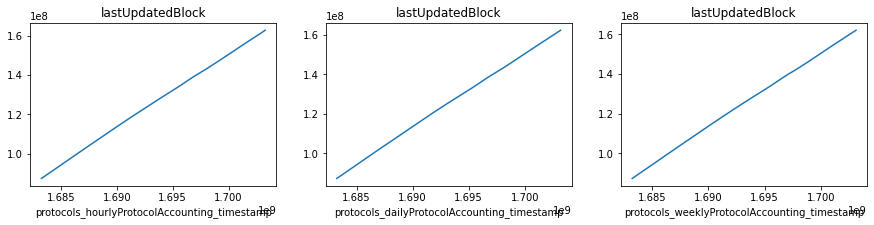

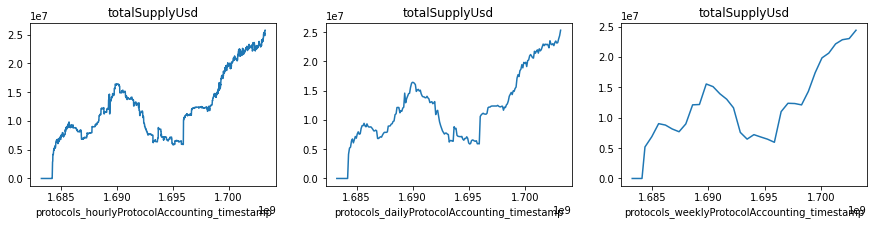

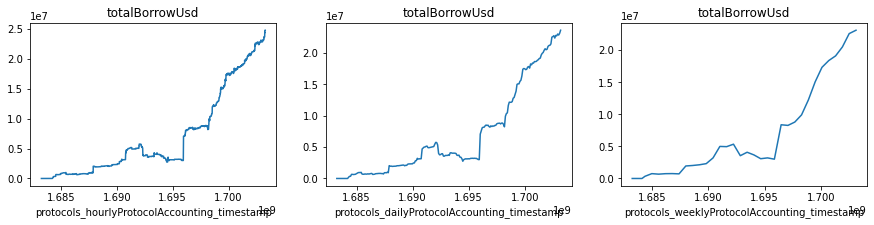

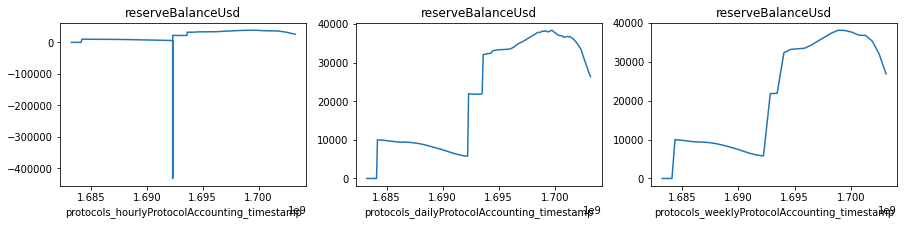

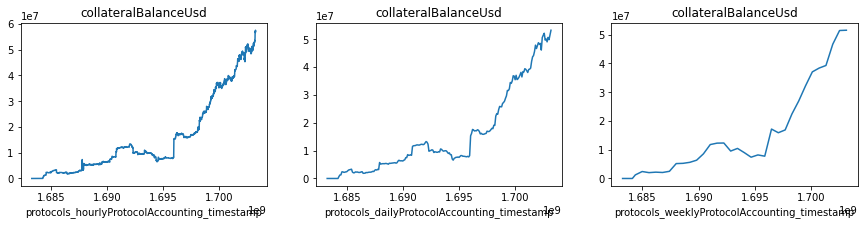

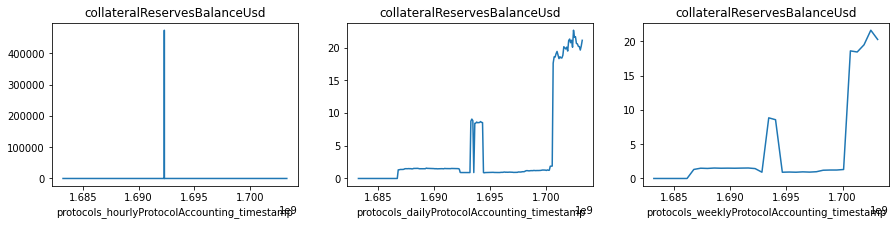

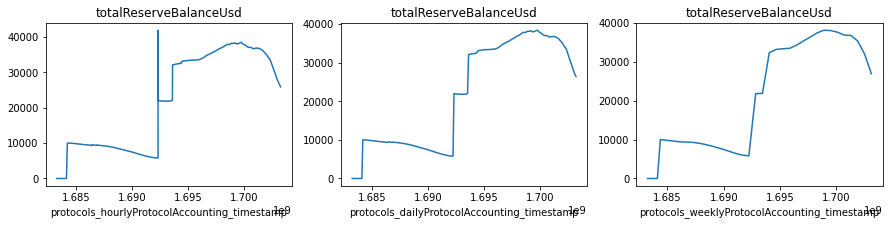

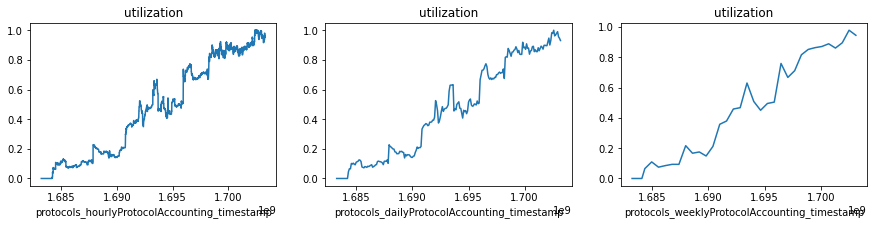

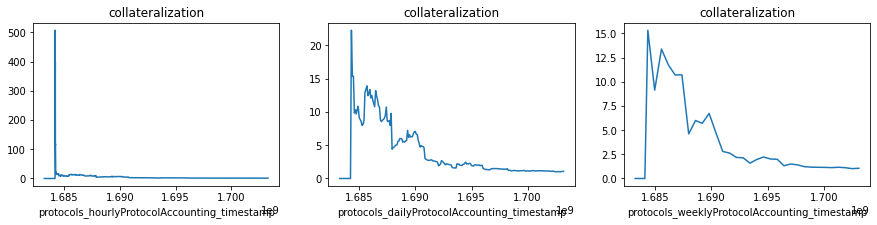

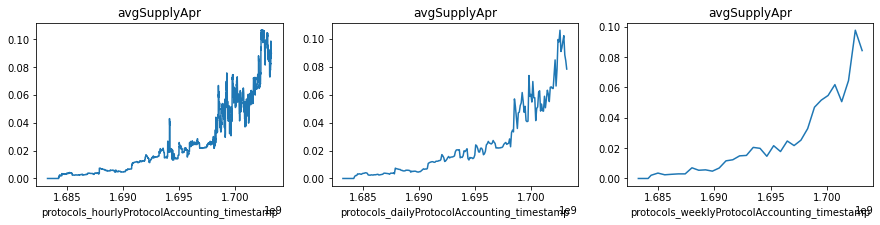

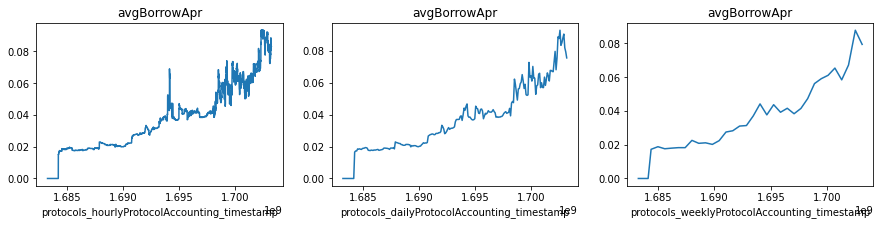

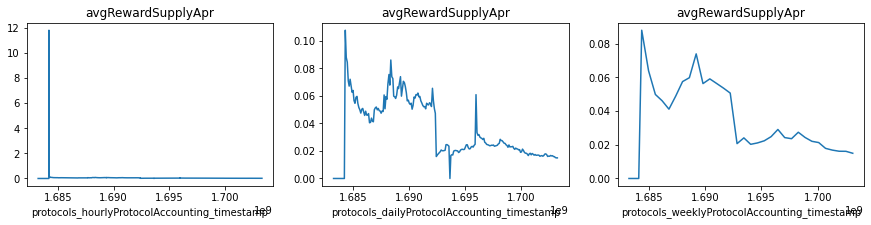

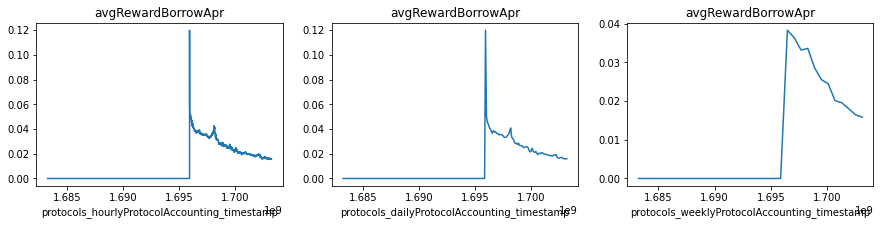

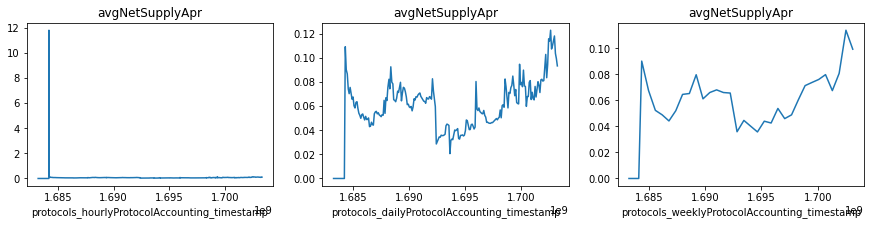

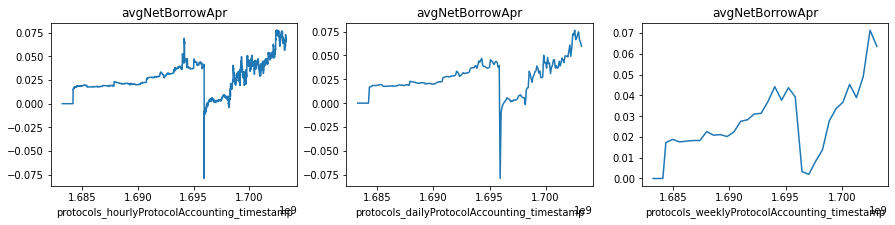

In [80]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


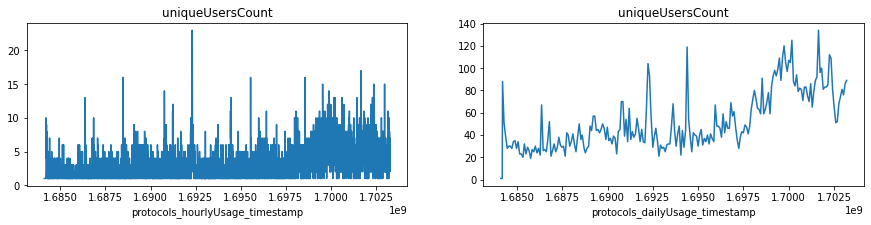

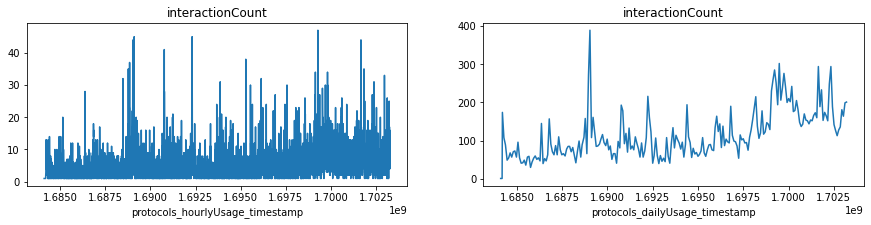

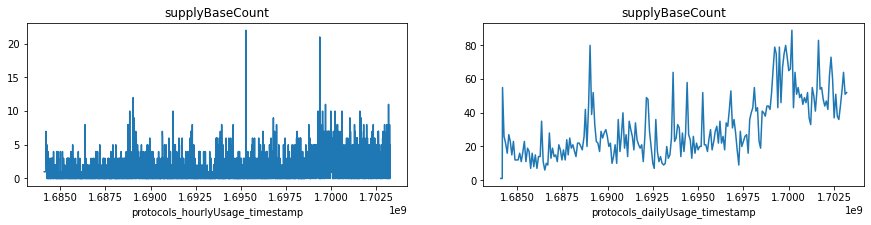

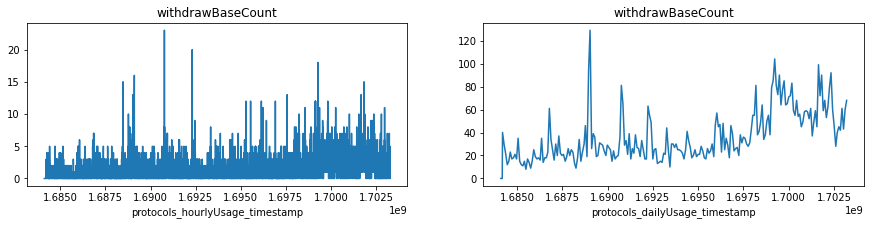

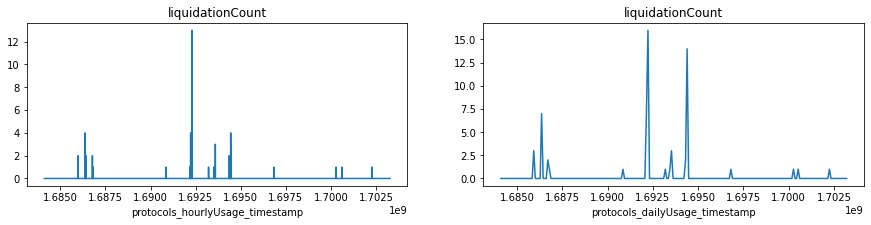

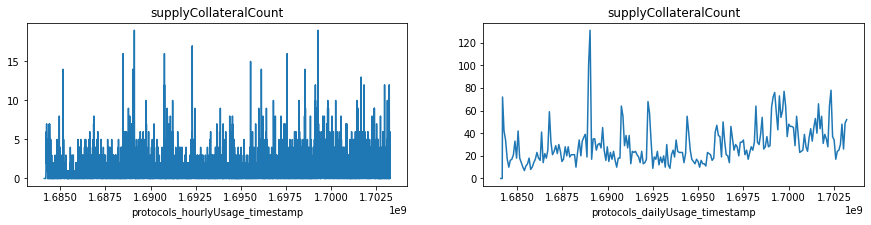

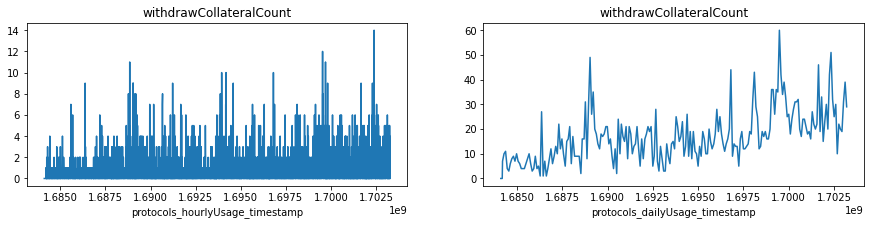

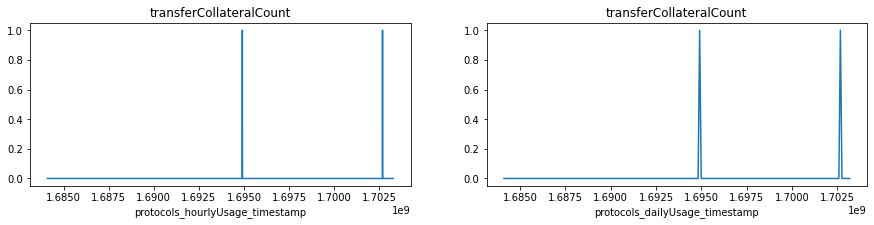

In [81]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound USDC - Market Accounting (hourly, daily, weekly)


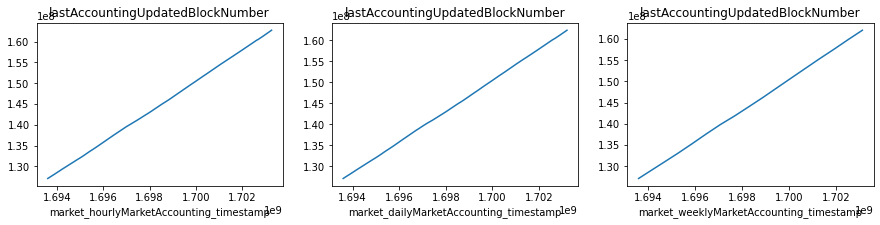

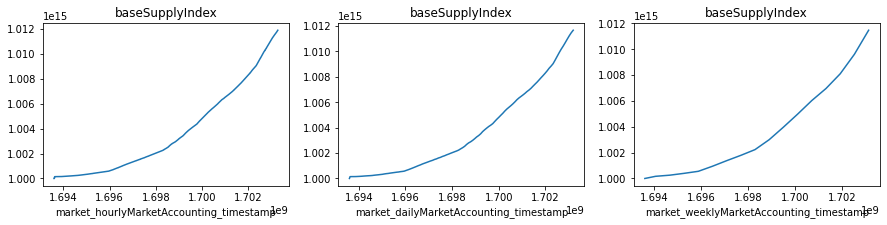

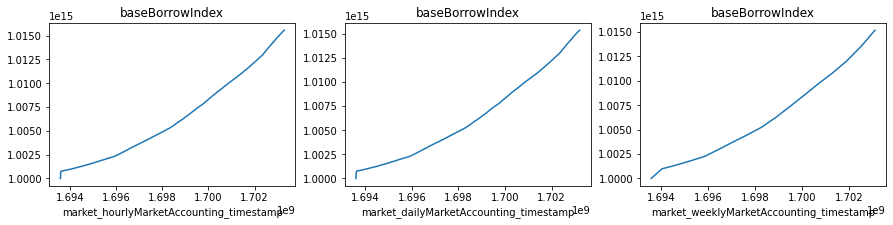

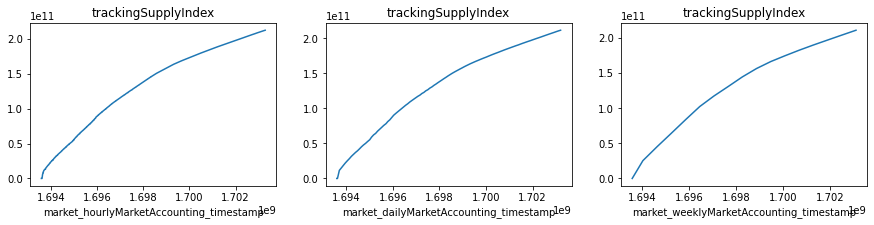

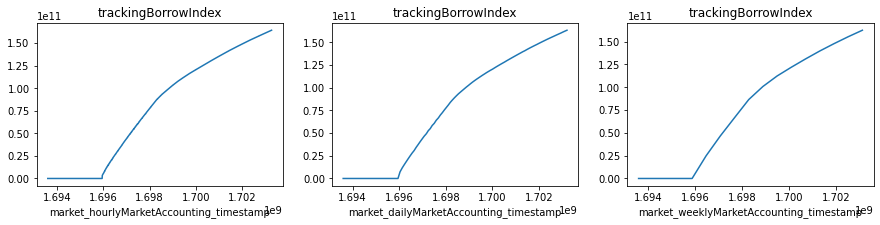

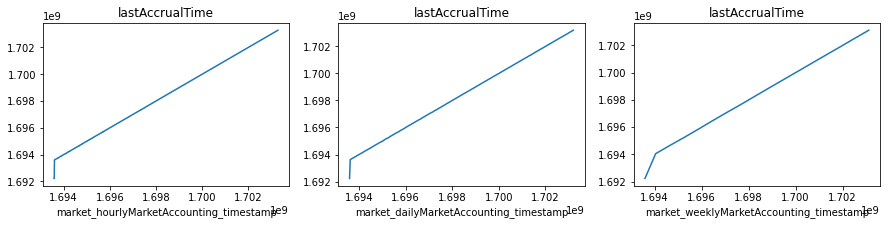

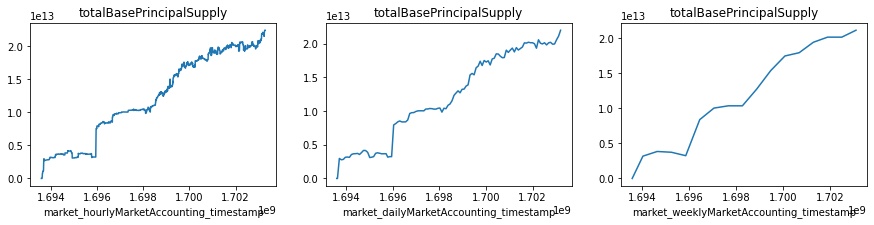

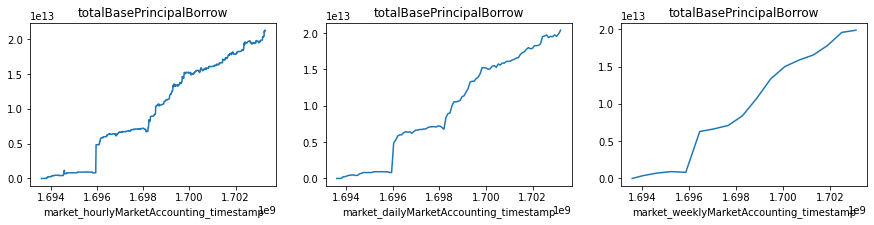

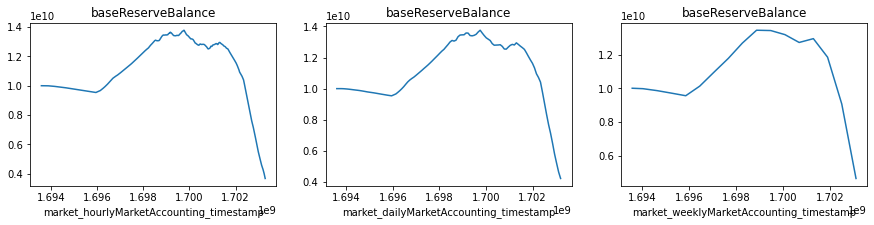

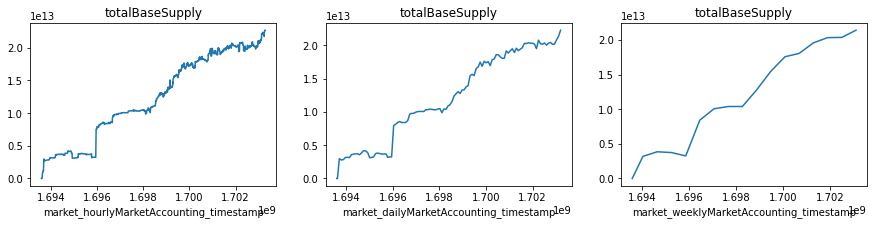

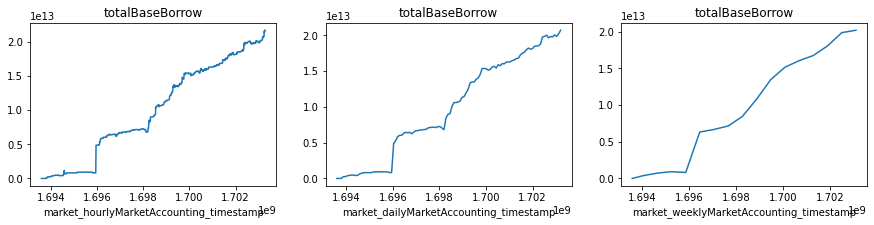

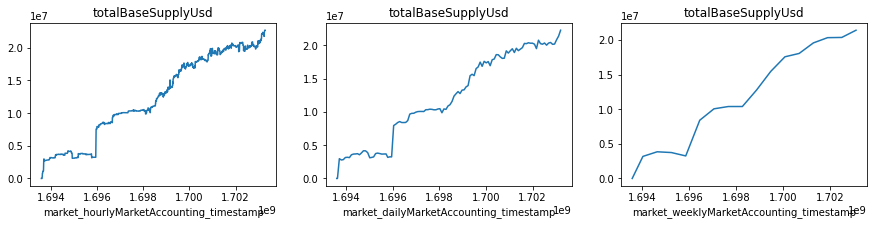

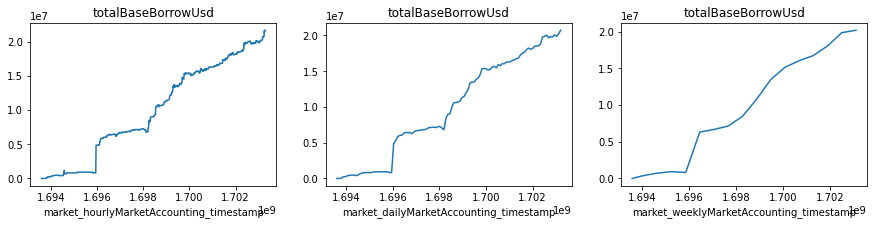

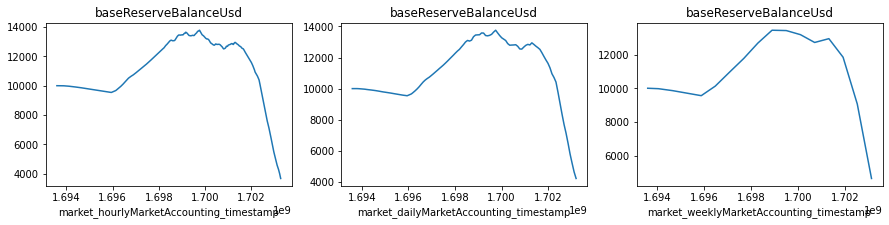

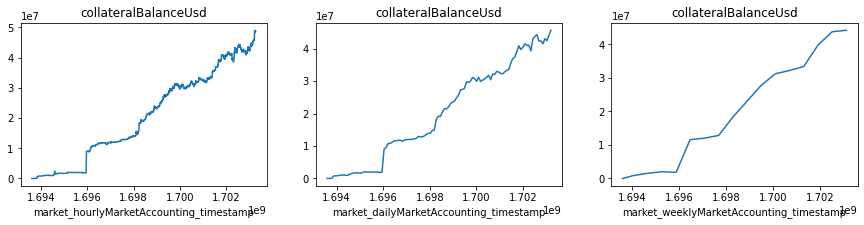

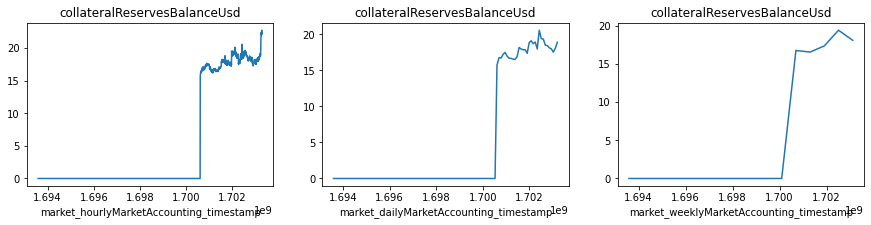

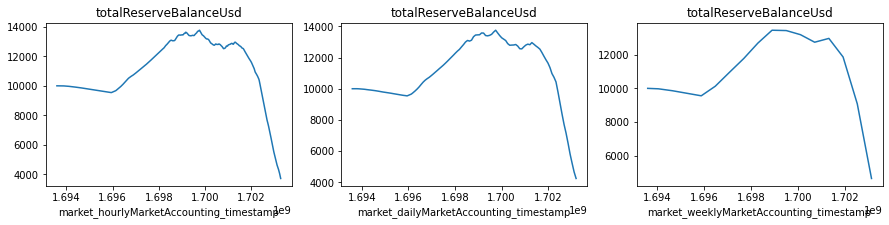

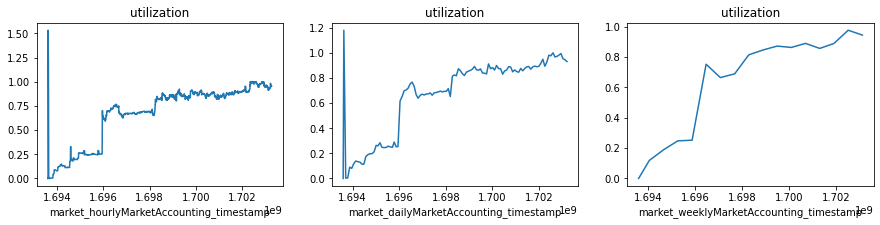

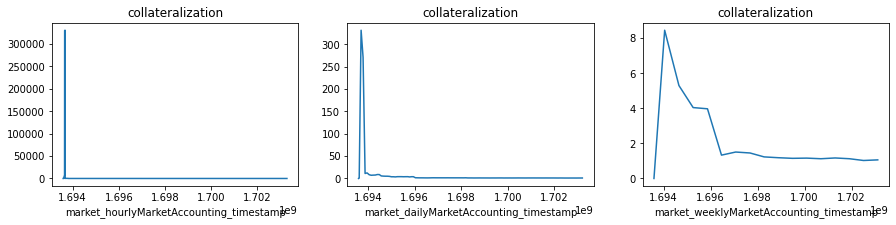

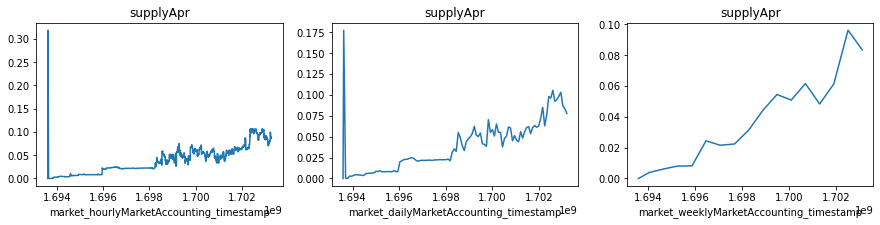

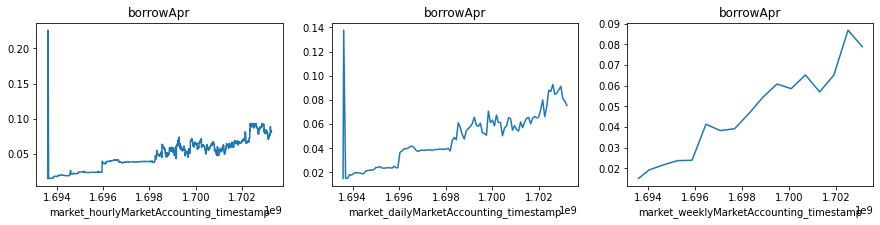

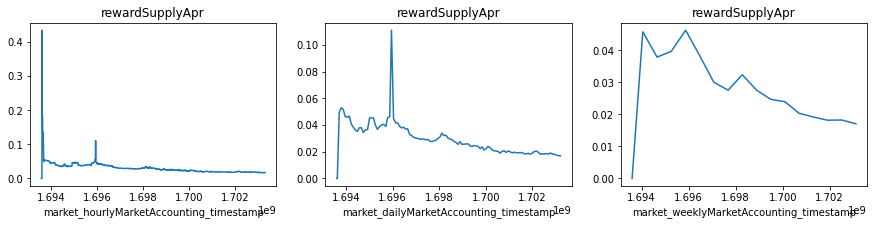

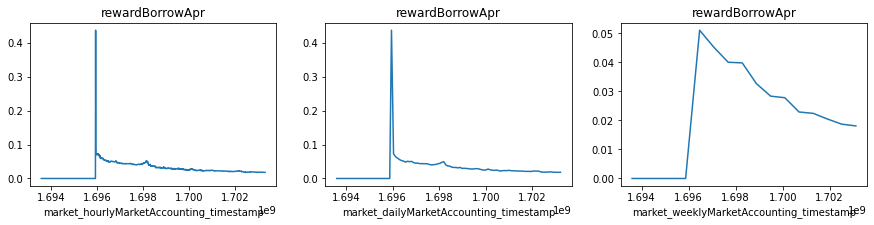

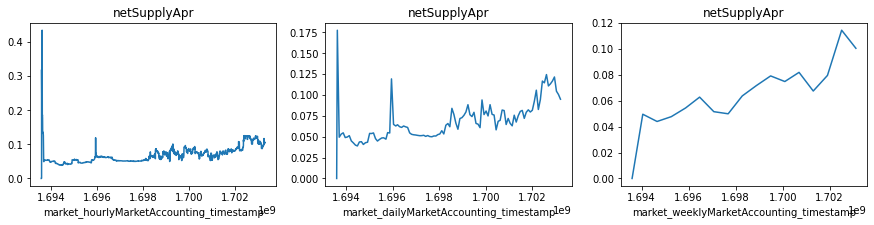

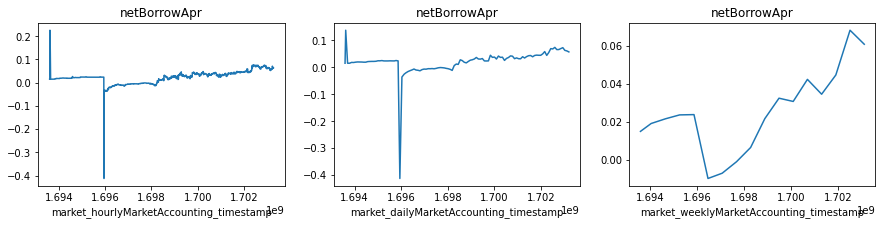

Compound USDC - Market Accounting (hourly, daily, weekly)


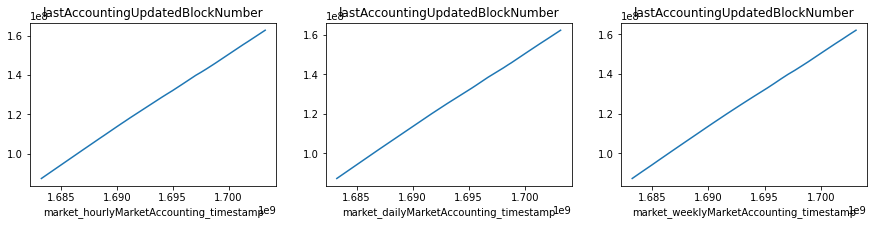

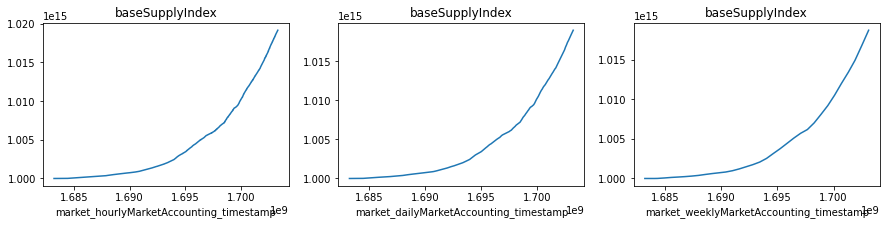

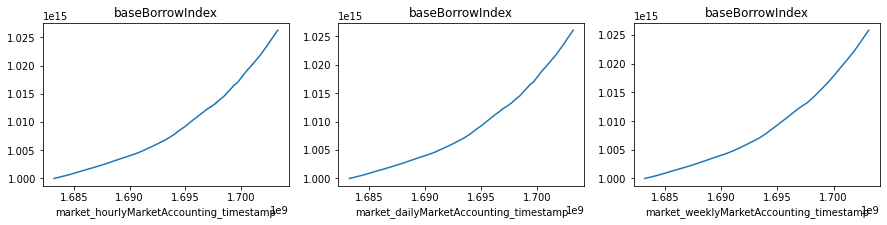

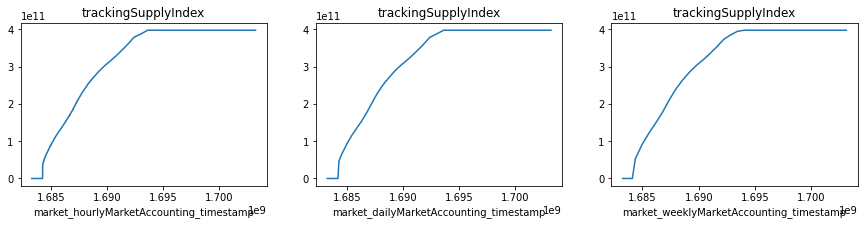

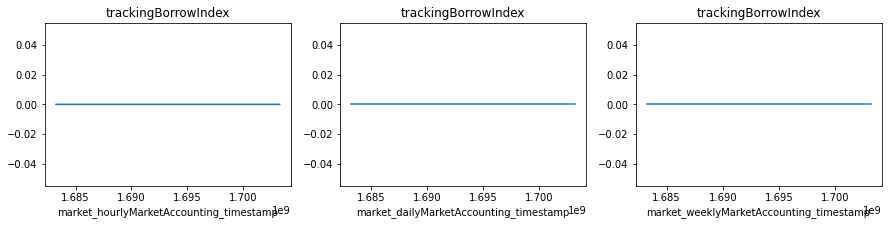

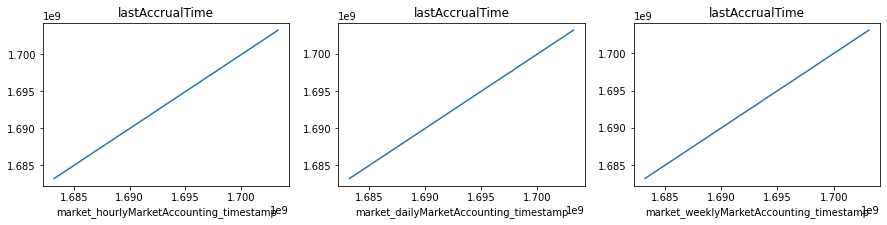

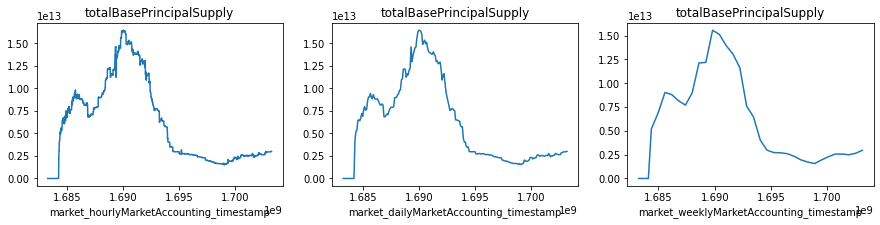

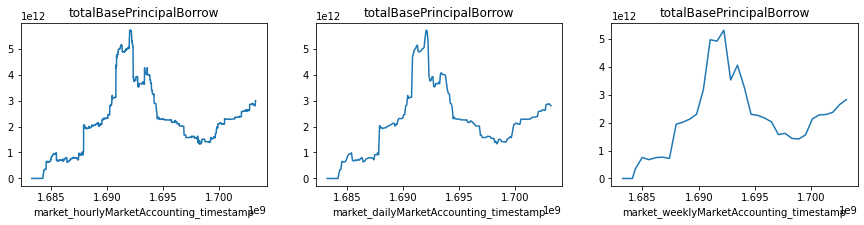

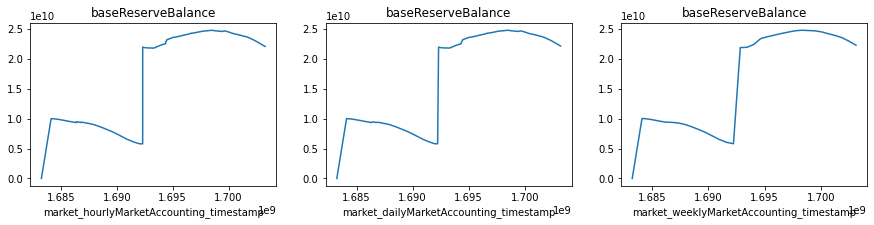

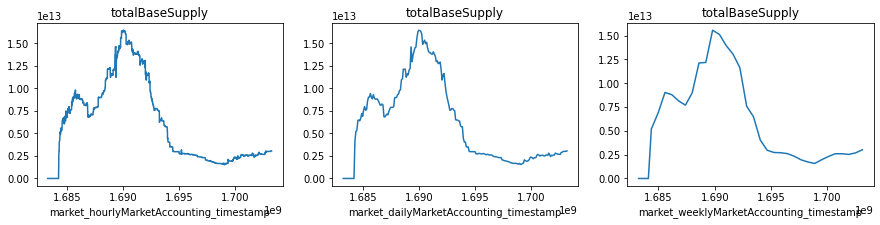

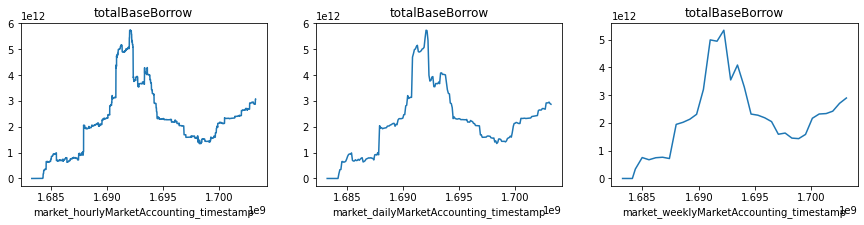

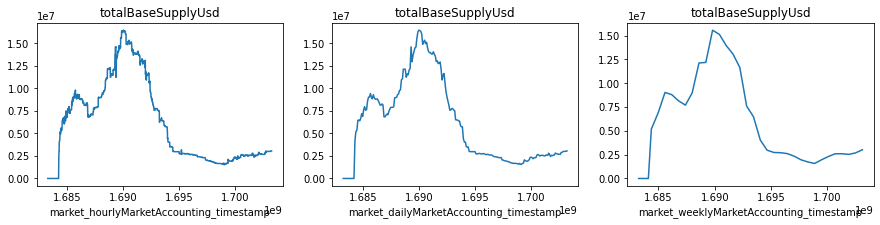

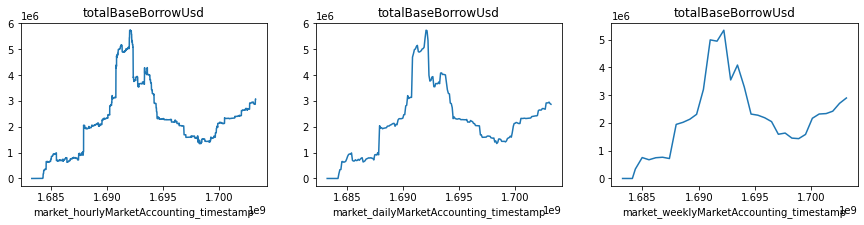

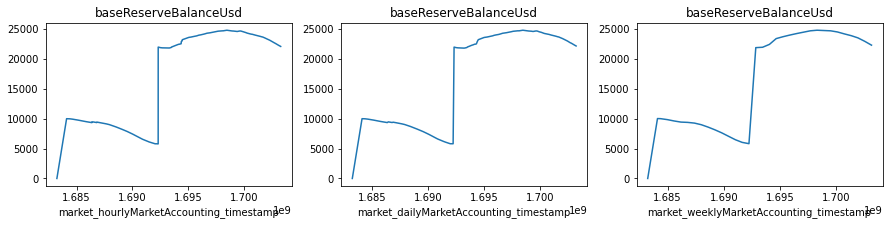

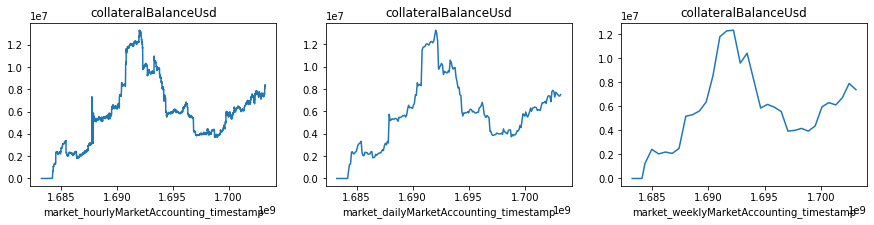

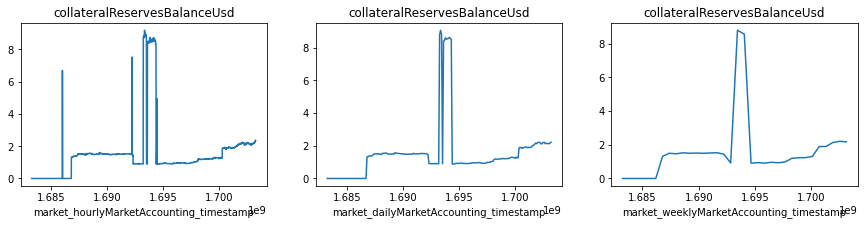

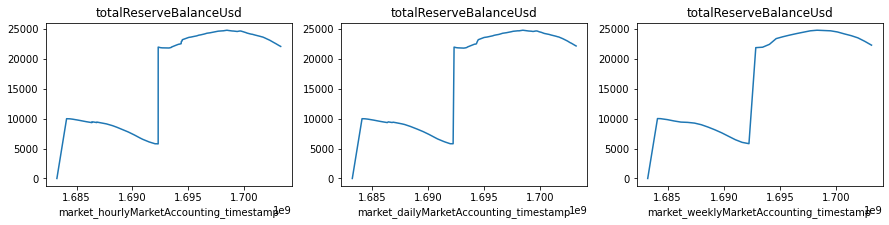

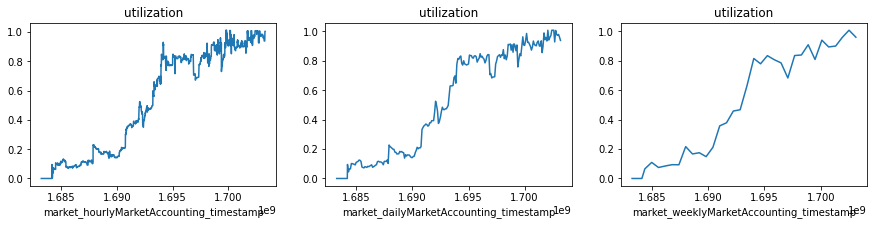

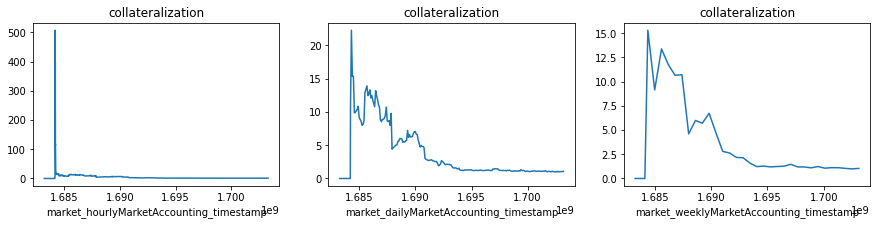

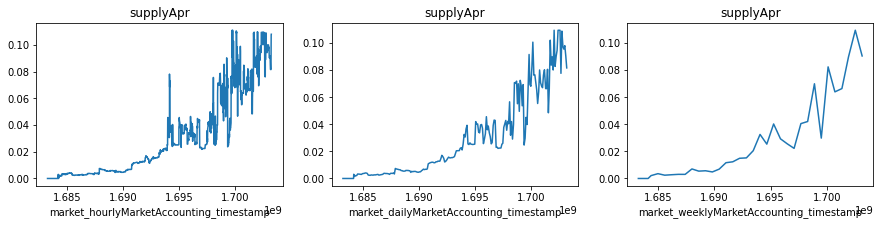

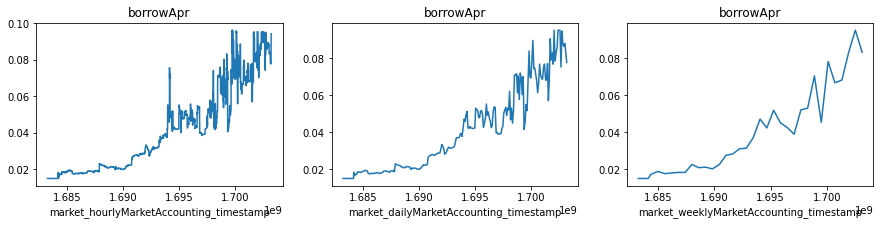

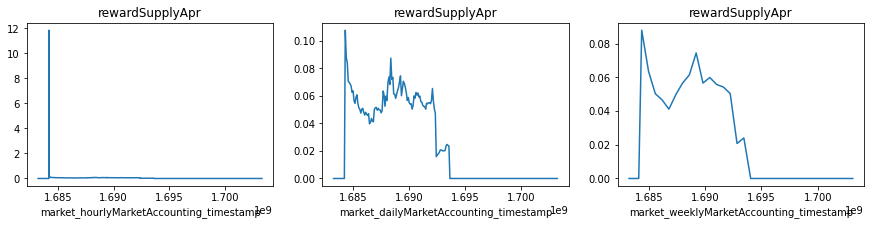

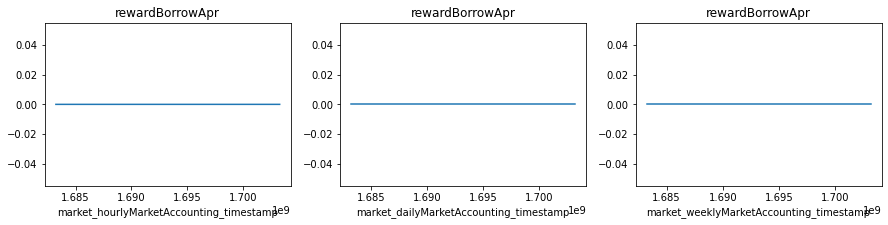

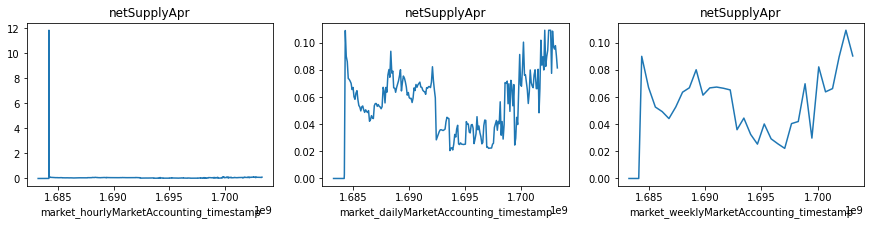

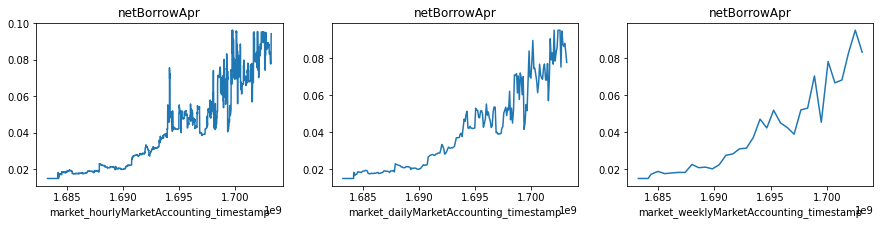

In [82]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")


Compound USDC - Market Configuration


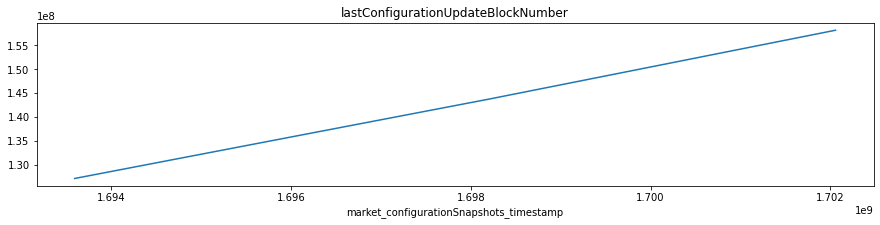

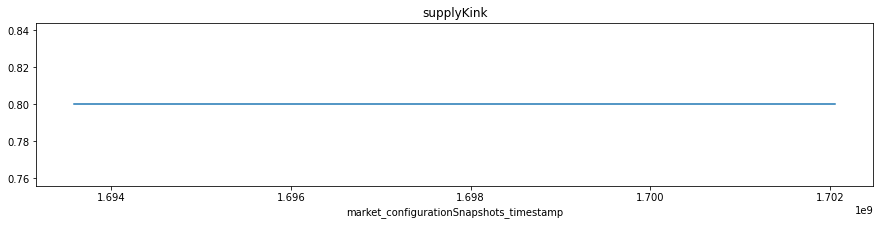

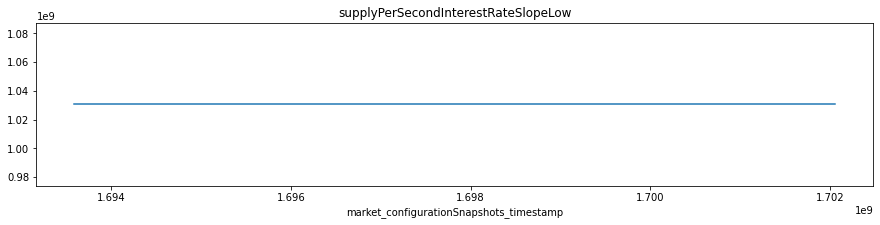

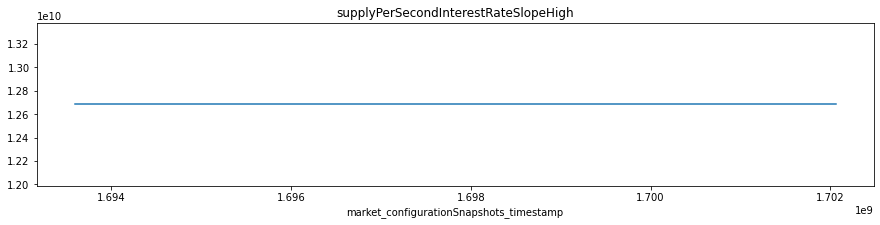

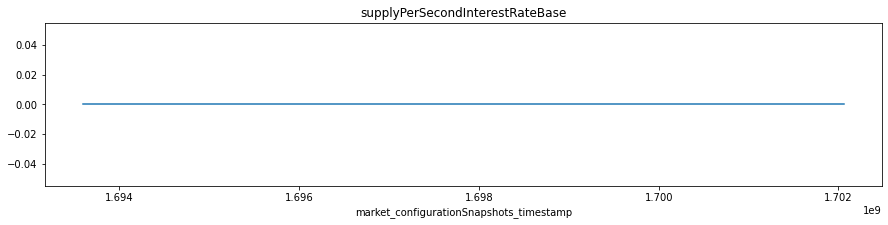

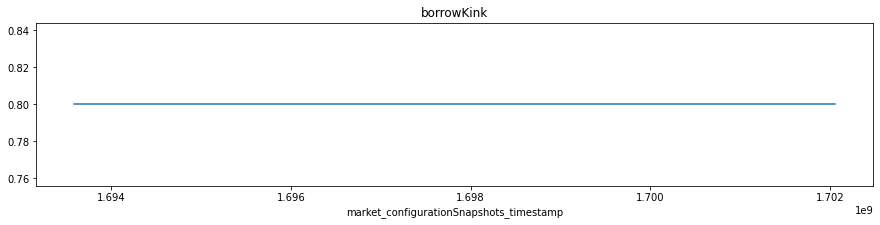

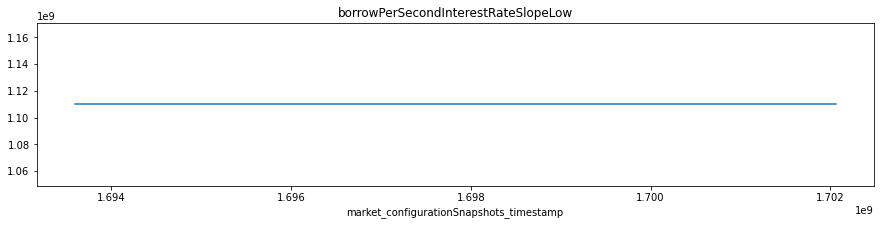

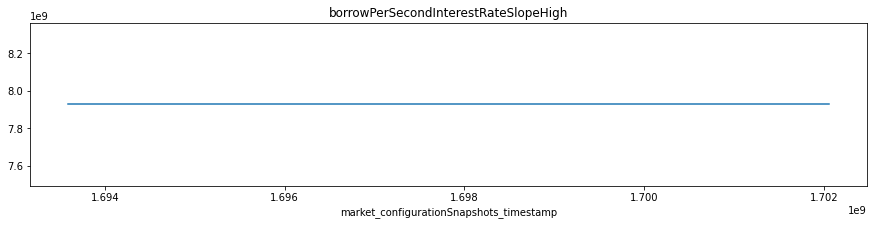

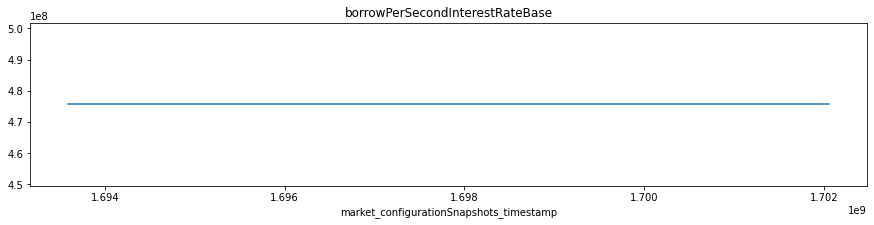

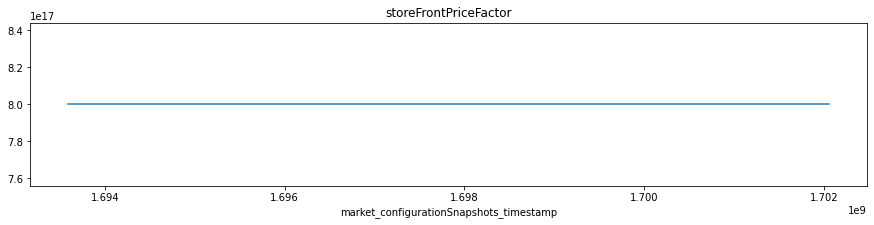

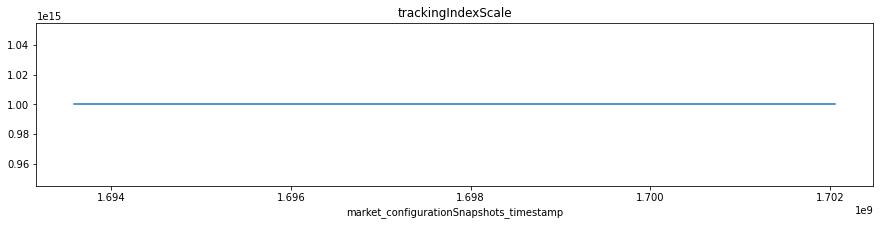

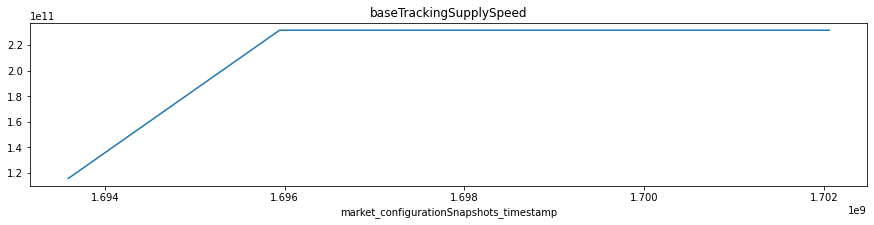

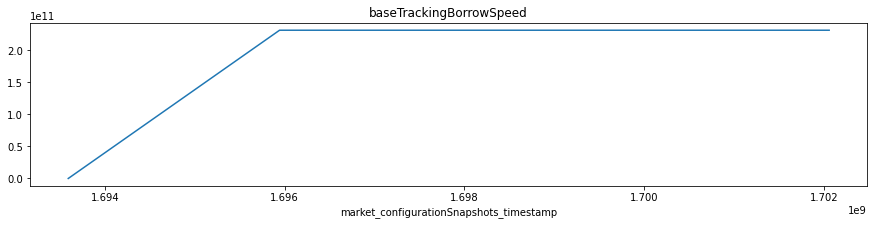

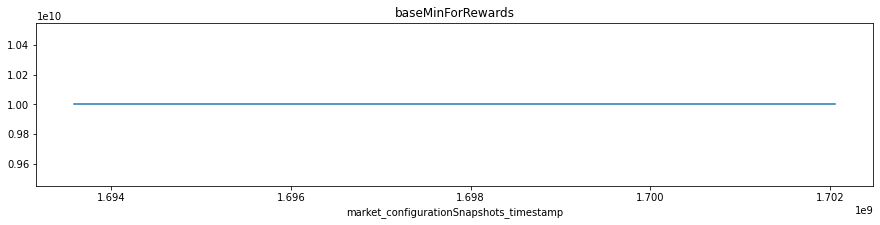

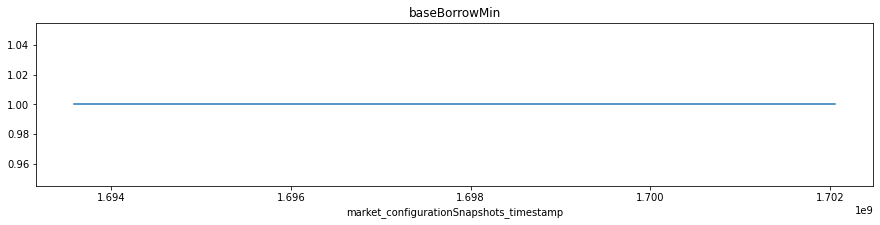

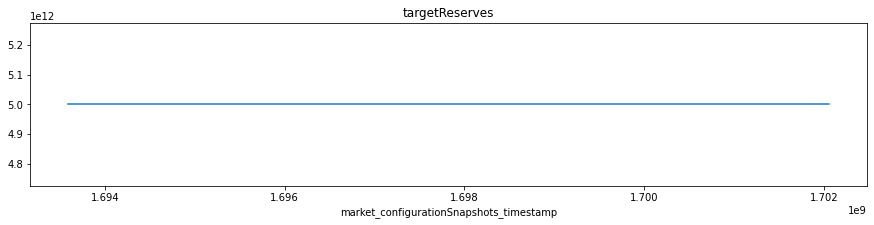

Compound USDC - Market Configuration


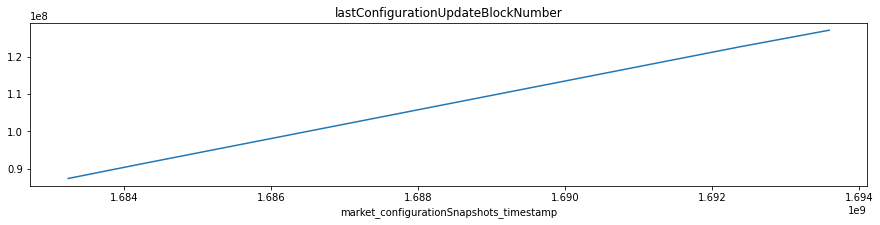

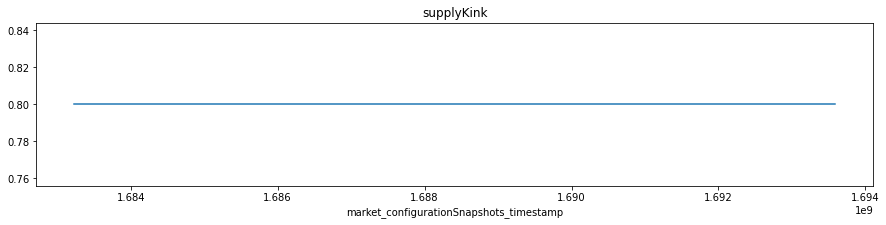

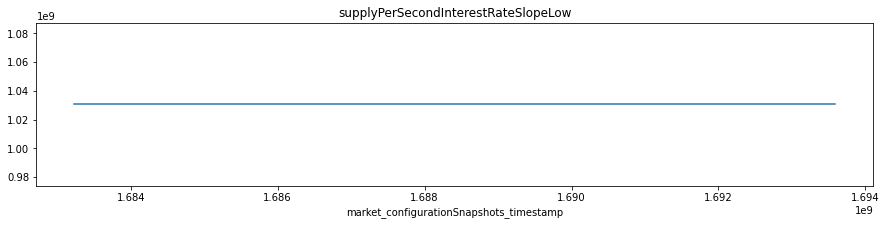

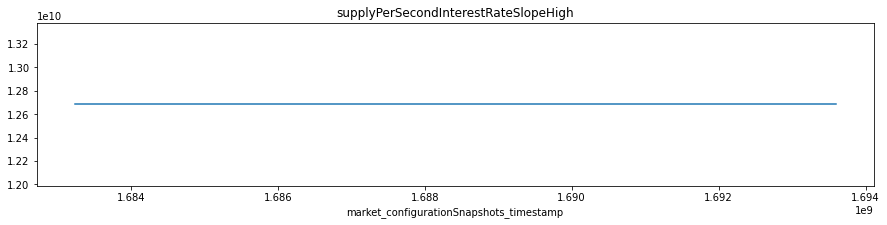

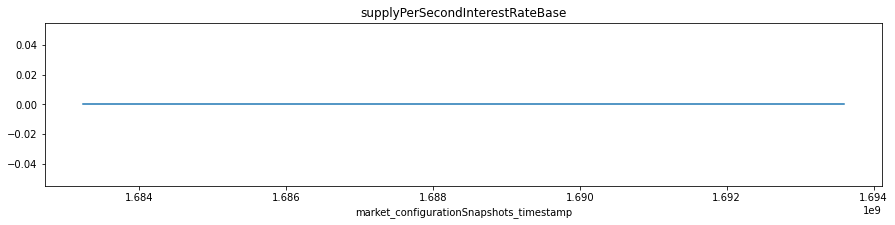

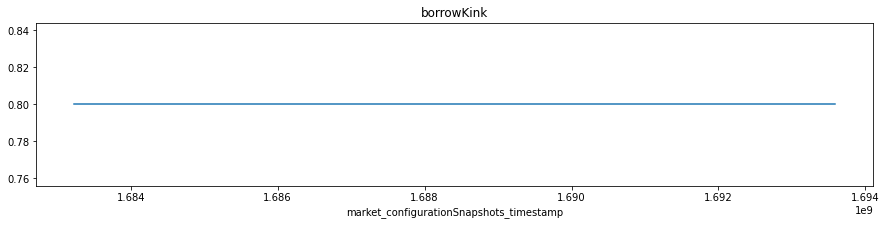

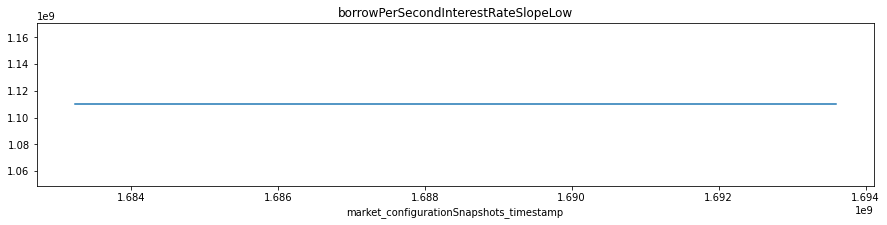

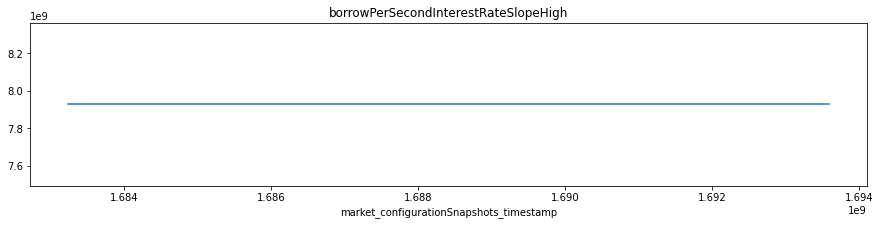

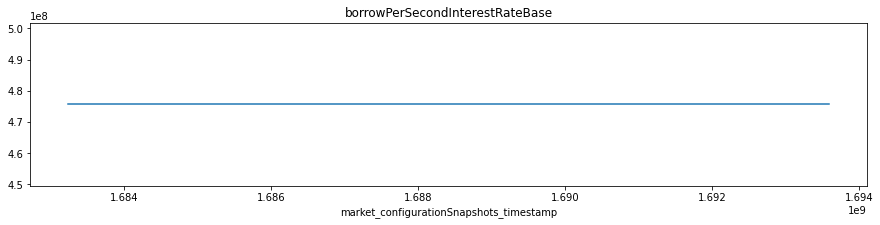

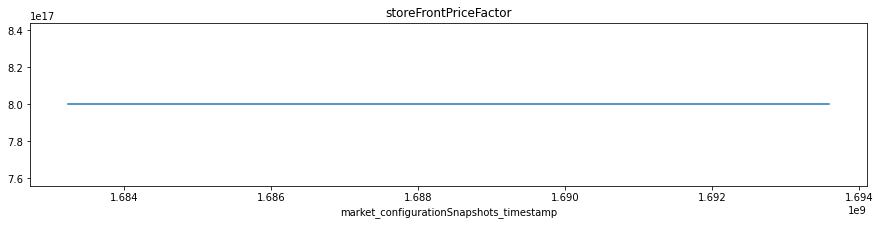

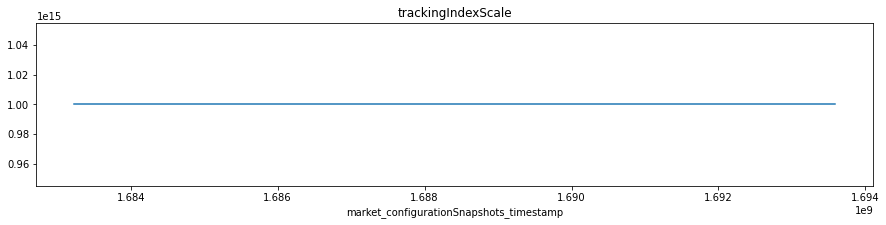

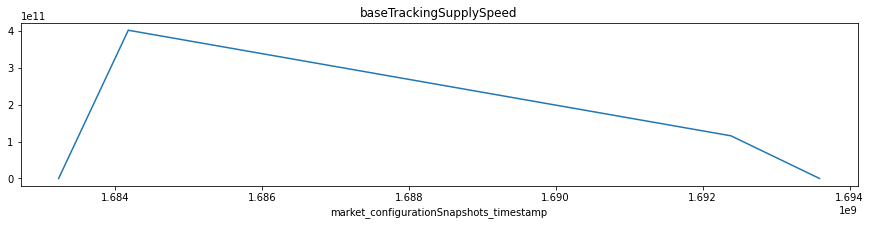

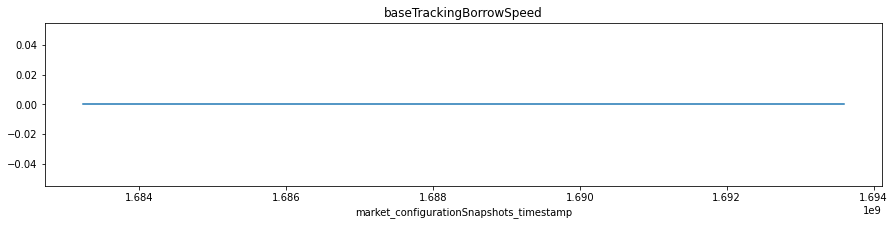

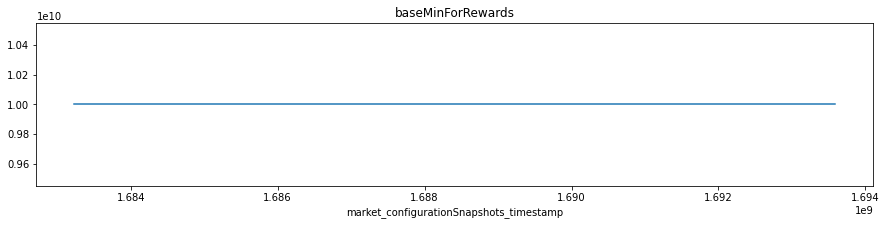

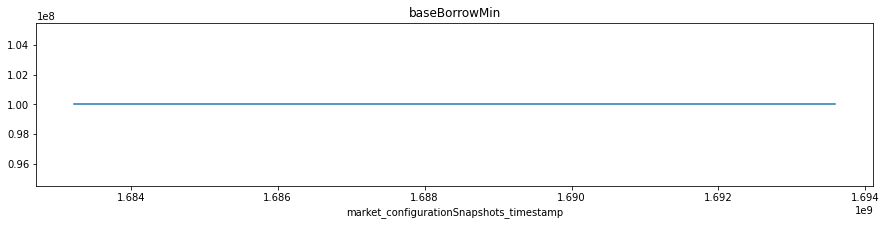

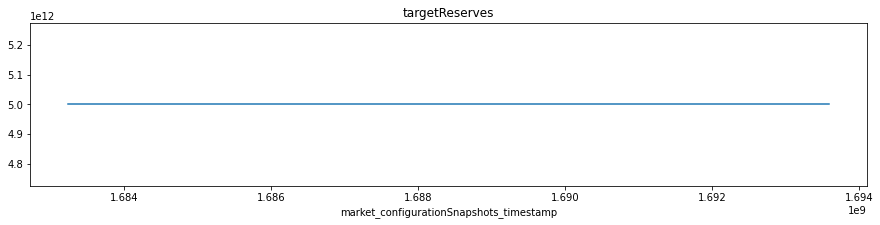

In [83]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 


Compound USDC - Market Usage (hourly, daily)


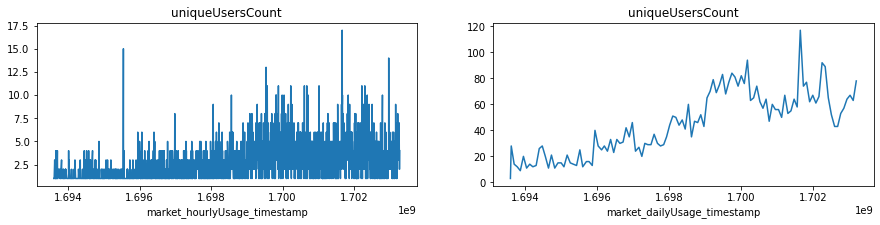

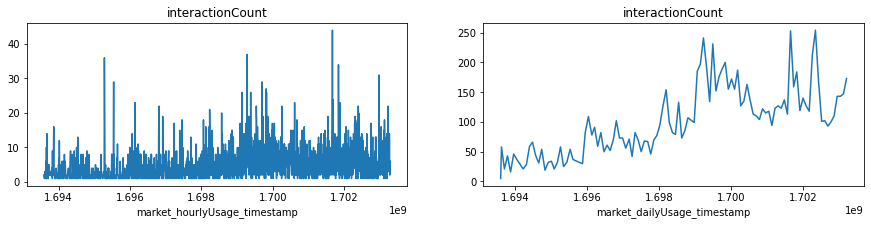

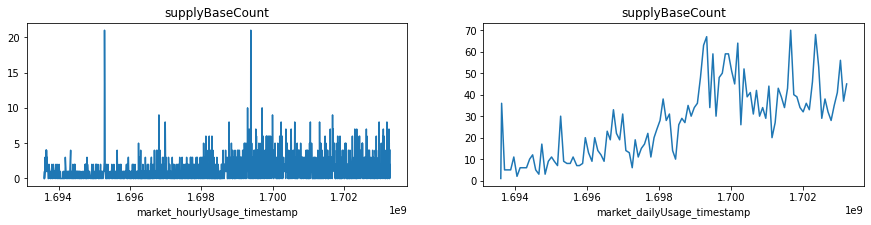

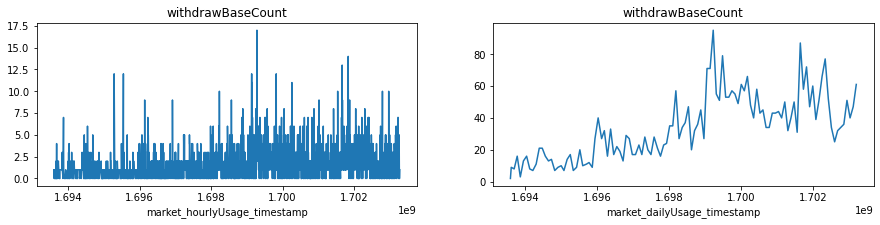

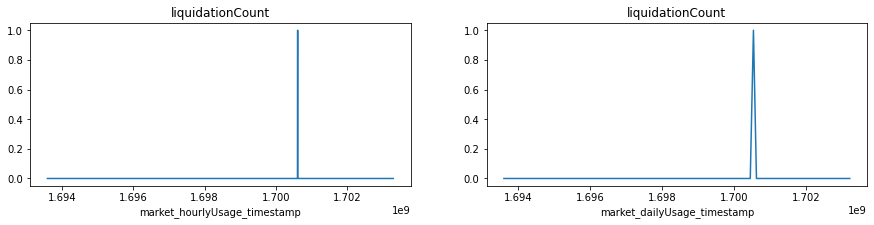

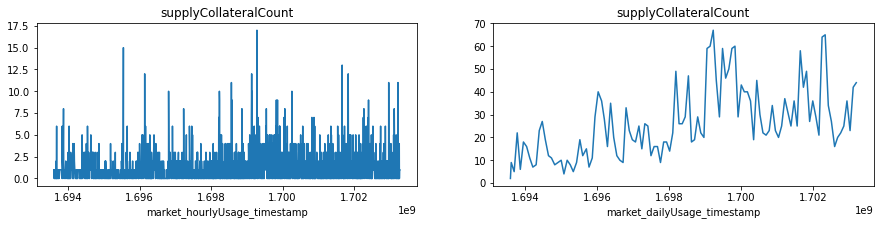

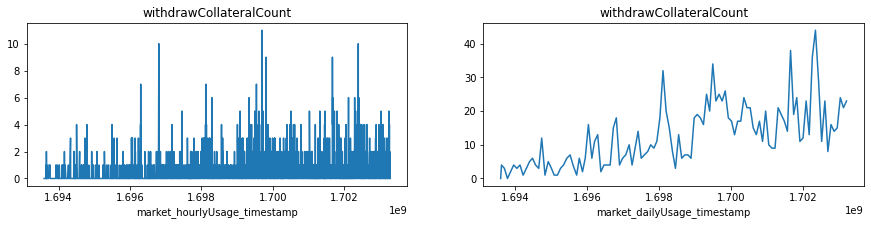

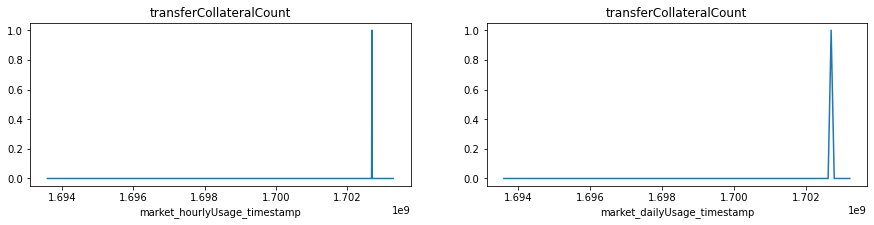

Compound USDC - Market Usage (hourly, daily)


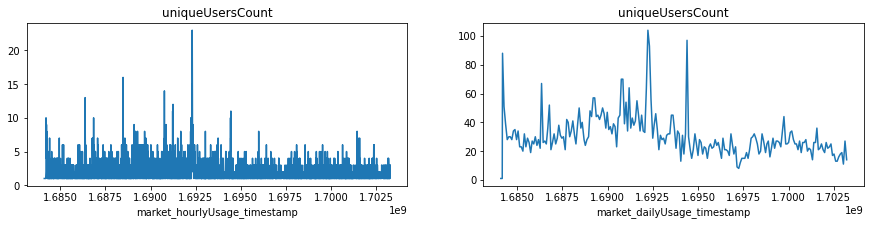

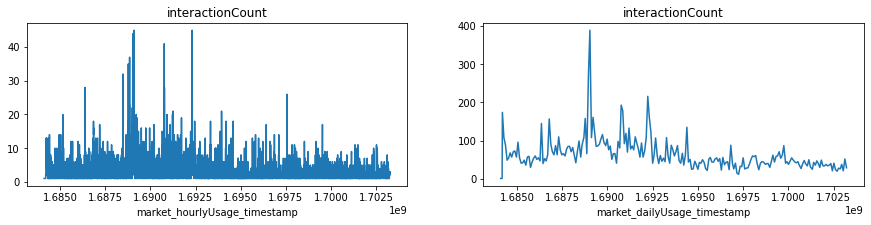

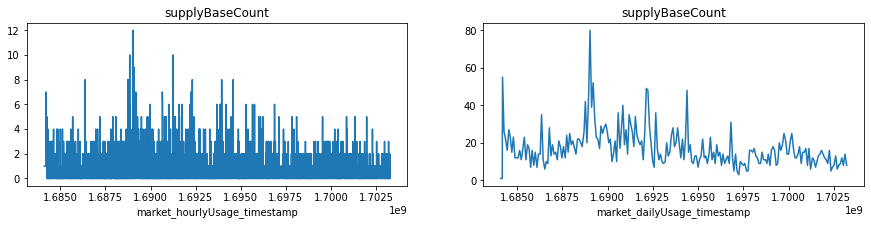

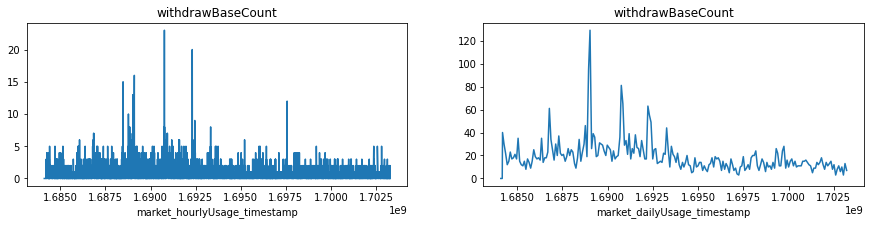

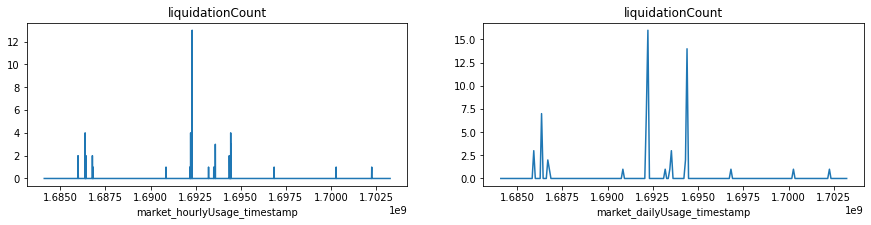

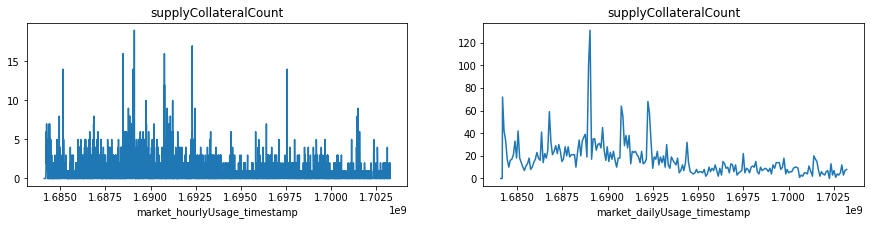

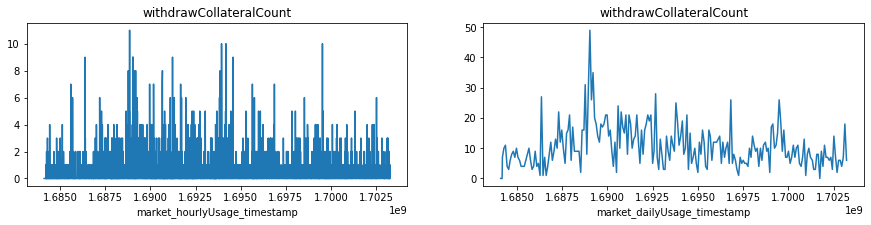

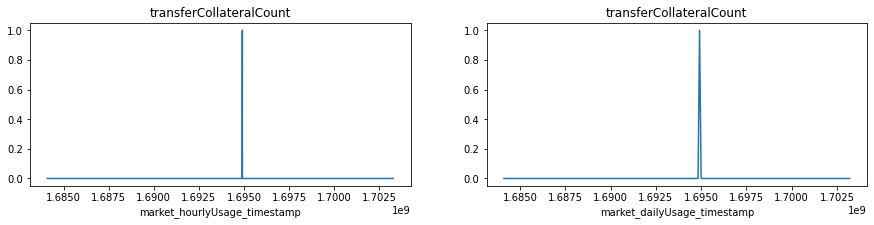

In [84]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")


position_positionAccountingSnapshots_timestamp  \
0                                      1695948286   
1                                      1695950176   
2                                      1695952569   
3                                      1695961378   
4                                      1698531125   
5                                      1699759889   

                                             position_positionAccountingSnapshots_accounting_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab9634150803   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab3450150801   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cabfd72150802   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab41f4150804   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cabefada30801   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cabb918ea0801   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                               135607446   
1                                                               135614516   
2                                                               135623421   
3                                                               135656513   
4                                                               144944623   
5                                                               149559481   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf79ebe380b16514e2710903e175b1ab52100d8cab   

   position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                  1539106813403   
1                                                  2770390963209   
2                                                  3078265210666   
3                                                  3652918539633   
4                                                  4033214410087   
5                                                  4331920146221   

   position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                1539999486394   
1                                                2772000873234   
2                                                3080055879047   
3                                                3655064266270   
4                                                4043361141352   
5                                                4350689041249   

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                        87564129431   
1                                                        87655570088   
2                                                        87747495301   
3                                                        88067590712   
4                                                       149781357731   
5                                                       169945102042   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                                    0   
1                                                               140736   
2                                                               395404   
3                               

0x79ebe380b16514e2710903e175b1ab52100d8cab - Position Accounting


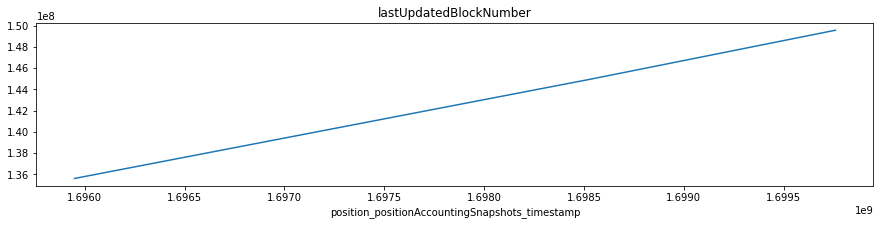

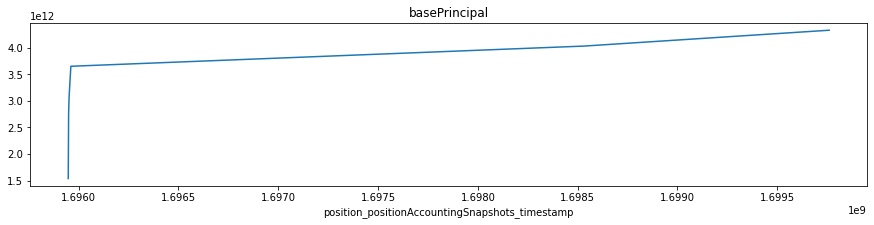

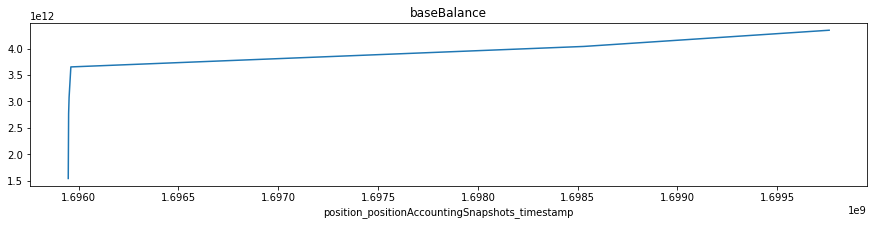

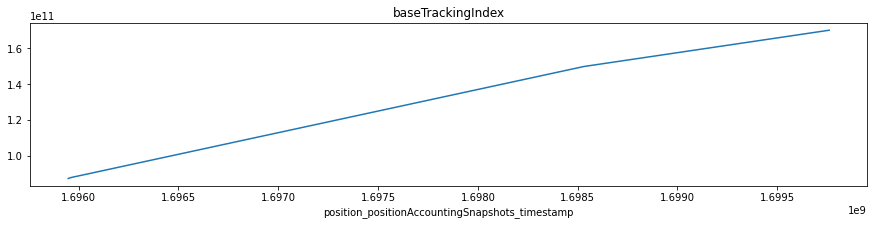

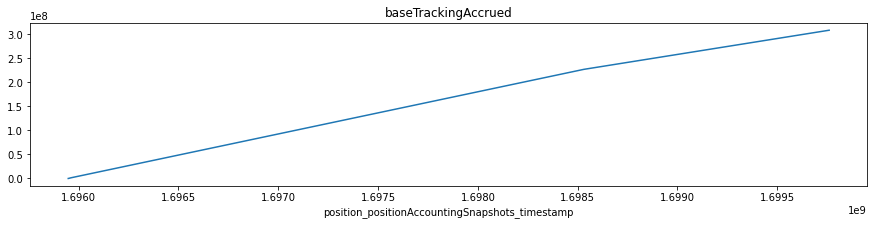

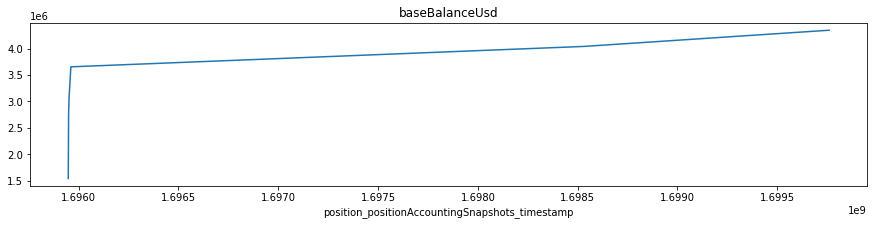

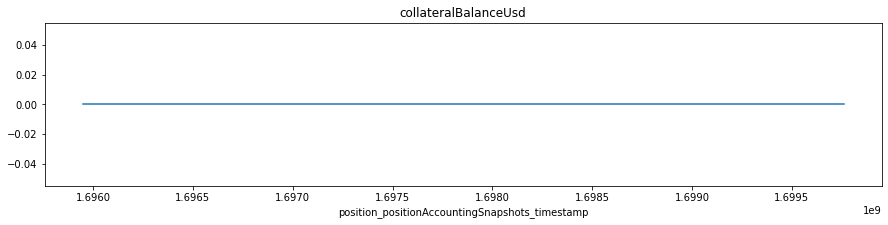

position_positionAccountingSnapshots_timestamp  \
0                                      1693695735   
1                                      1694917665   
2                                      1694921439   
3                                      1695953568   
4                                      1695955923   
5                                      1697393853   
6                                      1698541207   
7                                      1699148488   
8                                      1699756827   

                                             position_positionAccountingSnapshots_accounting_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aaee72f990701   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aaeefe8da0701   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae7018db0701   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aaed181150804   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae9ba4150803   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aaef2a4650801   
6  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae2b24a40801   
7  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae957fc60801   
8  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aaeccebe90801   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                               127479783   
1                                                               131786991   
2                                                               131799152   
3                                                               135627217   
4                                                               135636123   
5                                                               140879090   
6                                                               144974891   
7                                                               147226517   
8                                                               149547980   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
1  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
2  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
3  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
4  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
5  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
6  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
7  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   
8  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf1d5d3c315824519b5e5c72a85994e42b90228aae   

   position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                  1804332654365   
1                                                  1794335748370   
2                                                   999689789092   
3                                                              0   
4                                                  1249268711288   
5                                                  1249820968515   
6                                                  1577191370652   
7                                                  1680788425052   
8                                                  1810228125490   

   position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                1804599971824   
1     

0x1d5d3c315824519b5e5c72a85994e42b90228aae - Position Accounting


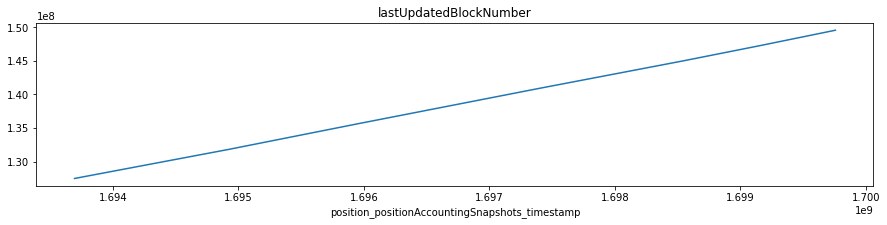

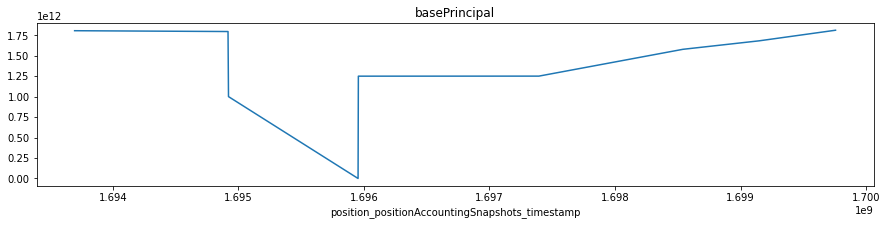

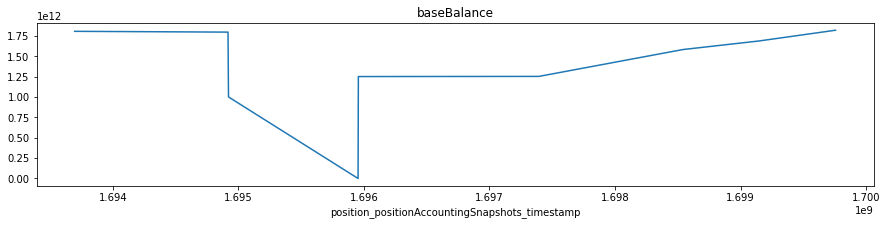

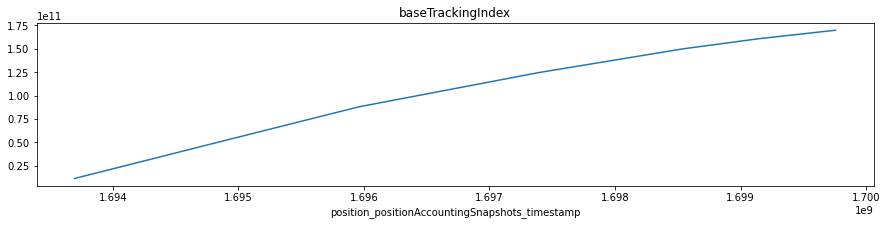

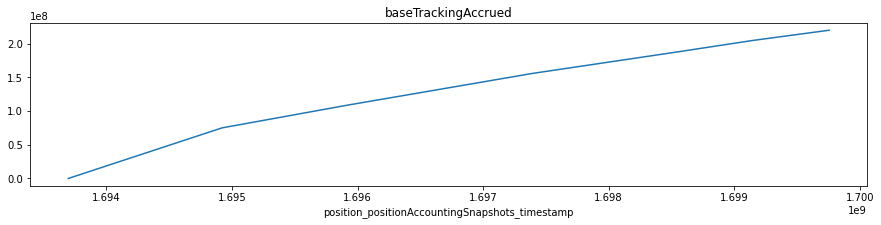

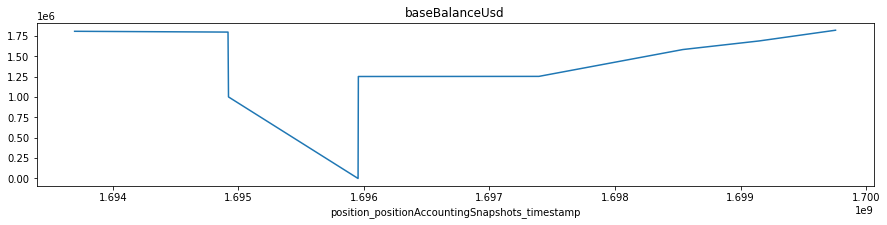

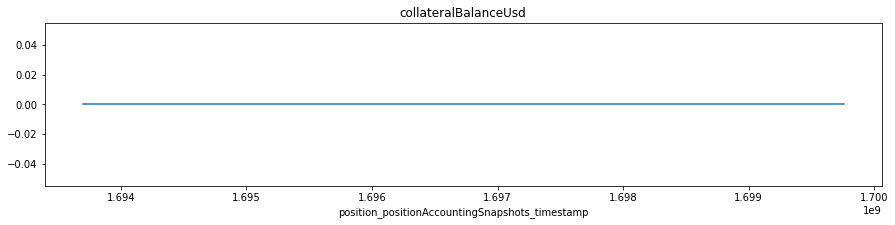

position_positionAccountingSnapshots_timestamp  \
0                                        1698837511   
1                                        1698837696   
2                                        1698837730   
3                                        1698837749   
4                                        1698837764   
..                                              ...   
401                                      1703254088   
402                                      1703258912   
403                                      1703258912   
404                                      1703263024   
405                                      1703281931   

                                               position_positionAccountingSnapshots_accounting_id  \
0    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7de4db40804   
1    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7c450b40801   
2    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f74b51b40806   
3    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f79451b40803   
4    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7ce51b4080d   
..                                                                                            ...   
401  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7ea3cb10916   
402  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f74c88b1091c   
403  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f74c88b10923   
404  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7a9c8b10908   
405  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7ccedb20929   

     position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                 146034142   
1                                                                 146034884   
2                                                                 146035019   
3                                                                 146035092   
4                                                                 146035150   
..                                                                      ...   
401                                                               162610410   
402                                                               162629708   
403                                                               162629708   
404                                                               162646185   
405                                                               162721228   

                            position_positionAccountingSnapshots_accounting_position_id  \
0    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
1    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
2    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
3    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
4    0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
..                                                                                  ...   
401  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
402  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
403  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
404  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   
405  0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf15ad422c4983113a0d332ff9144bea992d0120f7   

     position_positionAccountingSnapshots_accounting_basePrincipal  \
0                  

0x15ad422c4983113a0d332ff9144bea992d0120f7 - Position Accounting


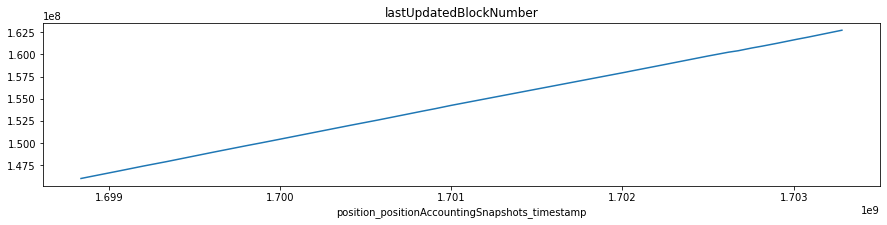

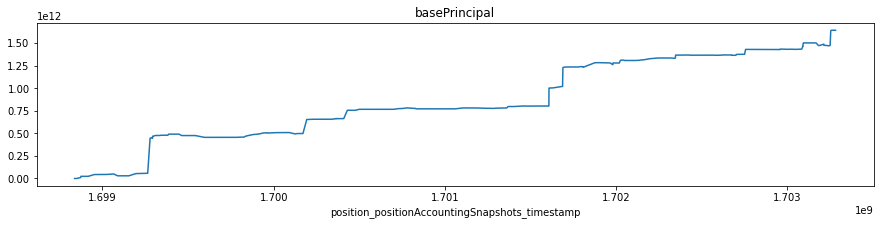

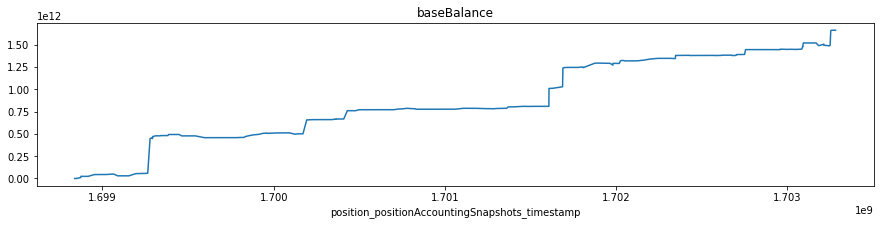

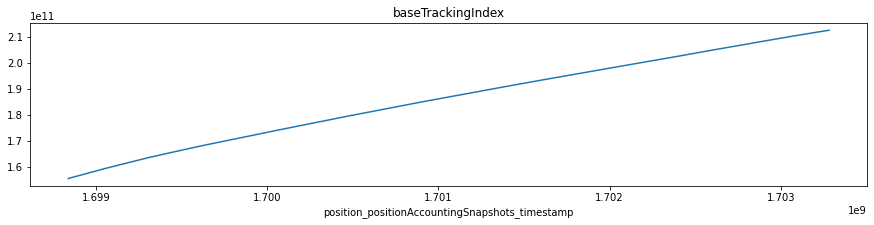

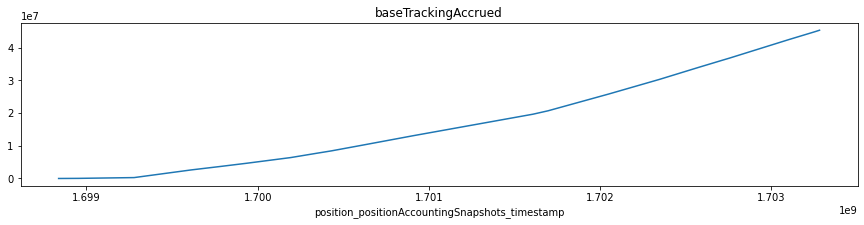

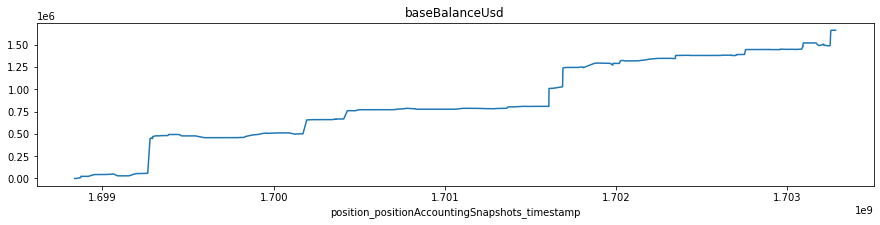

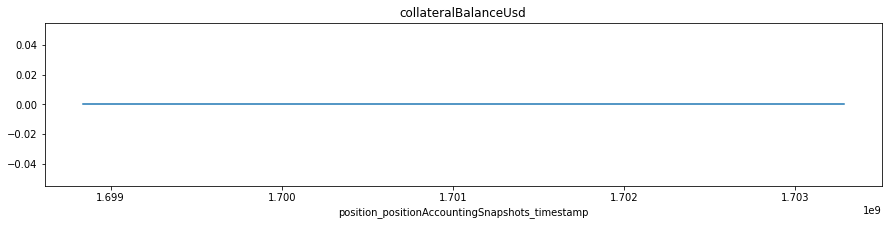

In [85]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 
